# Plant Disease Identifier

<p><b>1. Data Preparation</b></p>
<p>&nbsp; &nbsp; 1.1. Authenticate Google Drive</p>
<p>&nbsp; &nbsp; 1.2 Get train-test dataset files from Google Drive</p>
<p>&nbsp; &nbsp; 1.3 Download Train/Test dataset files and extract the images</p>
<p>&nbsp; &nbsp; 1.4 Download the retrain, label_image and quantize_graph python files</p>

<p><b>2. Exploratory Data Analysis</b></p>
<p>&nbsp; &nbsp; 2.1 Show sample images from each category</p>

<p><b>3. Model Training</b></p>
<p>&nbsp; &nbsp; 3.1 Inception</p>

<p><b>4. Model Evaluation</b></p>
<p>&nbsp; &nbsp; 4.1 Helper functions for model evaluation</p>
<p>&nbsp; &nbsp; 4.2 Model Evaluation for Inception</p>

<p><b>5. Model Testing</b></p>

<p><b>6. Alternative Model</b></p>
<p>&nbsp; &nbsp; 6.1 MobileNet_v1_1.0_224</p>
<p>&nbsp; &nbsp; &nbsp; 6.1.1 Model Training</p>
<p>&nbsp; &nbsp; &nbsp; 6.1.2 Model Evaluation</p>
<p>&nbsp; &nbsp; &nbsp; 6.1.3 Model Testing</p>
<p>&nbsp; &nbsp; 6.2 MobileNet (Batch Size = 50)</p>
<p>&nbsp; &nbsp; &nbsp; 6.2.1 Model Training</p>
<p>&nbsp; &nbsp; &nbsp; 6.2.2 Model Evaluation</p>
<p>&nbsp; &nbsp; &nbsp; 6.2.3 Model Testing</p>
<p>&nbsp; &nbsp; 6.3 MobileNet (Batch Size = 200)</p>
<p>&nbsp; &nbsp; &nbsp; 6.3.1 Model Training</p>
<p>&nbsp; &nbsp; &nbsp; 6.3.2 Model Evaluation</p>
<p>&nbsp; &nbsp; &nbsp; 6.3.3 Model Testing</p>
<p>&nbsp; &nbsp; 6.4 MobileNet (Learning Rate = 0.1)</p>
<p>&nbsp; &nbsp; &nbsp; 6.4.1 Model Training</p>
<p>&nbsp; &nbsp; &nbsp; 6.4.2 Model Evaluation</p>
<p>&nbsp; &nbsp; &nbsp; 6.4.3 Model Testing</p>
<p>&nbsp; &nbsp; 6.5 Inception (Batch Size = 200)</p>
<p>&nbsp; &nbsp; &nbsp; 6.5.1 Model Training</p>
<p>&nbsp; &nbsp; &nbsp; 6.5.2 Model Evaluation</p>
<p>&nbsp; &nbsp; &nbsp; 6.5.3 Model Testing</p>
<p>&nbsp; &nbsp; 6.6 Inception (Batch Size = 50)</p>
<p>&nbsp; &nbsp; &nbsp; 6.6.1 Model Training</p>
<p>&nbsp; &nbsp; &nbsp; 6.6.2 Model Evaluation</p>
<p>&nbsp; &nbsp; &nbsp; 6.6.3 Model Testing</p>

<p><b>7. Model Optimization and Quantization</b></p>
<p>&nbsp; &nbsp; 7.1 Inception</p>
<p>&nbsp; &nbsp; &nbsp; 7.1.1 Optimization</p>
<p>&nbsp; &nbsp; &nbsp; 7.1.2 Quantization</p>
<p>&nbsp; &nbsp; 7.2 MobileNet</p>
<p>&nbsp; &nbsp; &nbsp; 7.2.1 Optimization</p>
<p>&nbsp; &nbsp; &nbsp; 7.2.2 Quantization</p>

<p><b>8. Deployed Model Test</b></p>
<p>&nbsp; &nbsp; 8.1 Prepare Test Data (all categories)</p>
<p>&nbsp; &nbsp; 8.2 Execute Test</p>
<p>&nbsp; &nbsp; 8.3 Summarize Test Results</p>

<p><b>9. Archive and Download</b></p>
<p>&nbsp; &nbsp; 9.1 Inception</p>
<p>&nbsp; &nbsp; 9.2 MobileNet</p>

## 1 Data Preparation

In [98]:
#Install Pydrive
!pip install PyDrive

### 1.1 Authenticate Google Drive

In [0]:
#Authenticate with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### 1.2 Get train-test dataset files from Google Drive


In [100]:
#Get the ID of the "DLSD_Project" folder in the root
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Misc, id: 1EaycQq5cL9ZKO5YiDla23ZbY54ZYE0qe
title: DLSD_Project, id: 1TiZId9K55cWXaDZgyLip_XAU37nh6PJ9


In [109]:
#Get the IDs of the dataset files in the "DLSD_Project" folder
dataset_ids = {}
pyfile_ids = {}

file_list = drive.ListFile({'q': "'1TiZId9K55cWXaDZgyLip_XAU37nh6PJ9' in parents and trashed=false"}).GetList()
for file1 in file_list:
  filename = file1['title']
  fileid = file1['id']
  print('title: %s, id: %s' % (filename, fileid))
  if(filename.endswith(".zip")):
     dataset_ids[filename] = fileid
  elif(filename.endswith(".py")):
     pyfile_ids[filename] = fileid    

title: Plant_Disease_Identifier.ipynb, id: 1LDtG_opIVz9P8Gq_wx0oH2-qrYGiDDqt
title: test_AllCat.zip, id: 1D1r6mR1GUQmNQSjjBanC_qY-Metvg3go
title: train.zip, id: 1CsDvW3OaNTmhPG1Vh3nq2Uk5BkwaJpg3
title: test.zip, id: 1BuMj7QX8qZVVMCcAT7xk9o-5mmyVeno_
title: retrain.py, id: 1QQKqzZnEojQo7fv3zcuIJAOAkqrReLTg
title: label_image.py, id: 1aBJkE-Z3ADdl8wqEy2KZIyE0vjj4S-9m
title: quantize_graph.py, id: 1mld6gmHPZMrcMTlKWS4tpSJVB23o56K4


### 1.3 Download Train/Test dataset files and extract the images

In [111]:
for i, (k, v) in enumerate(dataset_ids.items()):
  print("index: {}, key: {}, value: {}".format(i, k, v))

  #Download file from Google Drive to Colab
  fileId = drive.CreateFile({'id': v})

  filename = k
  print(filename)
  fileId.GetContentFile(filename)  # Save Drive file as a local file

  #Unzip the file
  !unzip $filename -d ./

index: 0, key: test_AllCat.zip, value: 1D1r6mR1GUQmNQSjjBanC_qY-Metvg3go
test_AllCat.zip
Archive:  test_AllCat.zip
   creating: ./test_AllCat/
   creating: ./test_AllCat/Apple___Apple_scab/
  inflating: ./test_AllCat/Apple___Apple_scab/AppleScab1.jpg  
  inflating: ./test_AllCat/Apple___Apple_scab/AppleScab2.jpg  
  inflating: ./test_AllCat/Apple___Apple_scab/AppleScab3.jpg  
   creating: ./test_AllCat/Apple___Black_rot/
  inflating: ./test_AllCat/Apple___Black_rot/AppleBlackRot1.jpg  
  inflating: ./test_AllCat/Apple___Black_rot/AppleBlackRot2.jpg  
  inflating: ./test_AllCat/Apple___Black_rot/AppleBlackRot3.jpg  
   creating: ./test_AllCat/Apple___Cedar_apple_rust/
  inflating: ./test_AllCat/Apple___Cedar_apple_rust/AppleCedarRust1.jpg  
  inflating: ./test_AllCat/Apple___Cedar_apple_rust/AppleCedarRust2.jpg  
  inflating: ./test_AllCat/Apple___Cedar_apple_rust/AppleCedarRust3.jpg  
   creating: ./test_AllCat/Apple___healthy/
  inflating: ./test_AllCat/Apple___healthy/AppleHealthy1.j

### 1.4 Download the retrain, label_image and quantize_graph python files

In [112]:
#Download retrain.py and label_image.py

for i, (k, v) in enumerate(pyfile_ids.items()):
  print("index: {}, key: {}, value: {}".format(i, k, v))

  fileId = drive.CreateFile({'id': v})
  filename = k
  print(filename)
  fileId.GetContentFile(filename)  # Save Drive file as a local file

index: 0, key: retrain.py, value: 1QQKqzZnEojQo7fv3zcuIJAOAkqrReLTg
retrain.py
index: 1, key: label_image.py, value: 1aBJkE-Z3ADdl8wqEy2KZIyE0vjj4S-9m
label_image.py
index: 2, key: quantize_graph.py, value: 1mld6gmHPZMrcMTlKWS4tpSJVB23o56K4
quantize_graph.py


## 2 Exploratory Data Analysis

### 2.1 Show sample images from each category

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

w=25
h=25
fig=plt.figure(figsize=(16, 16))
columns = 10
rows = 1

directory=os.listdir("train")

for each in directory:
  pltcat = each.split("___")
  print('\x1b[1;31m' + "Plant Name: " + pltcat[0].capitalize())
  print('\x1b[1;31m' + "Disease: " + pltcat[1].capitalize() if pltcat[1] != "healthy" else "Disease: None")
  fig=plt.figure(figsize=(16, 16))
  currentFolder = 'train/' + each
  imgs = os.listdir(currentFolder)[0:10]
  for i in range(1, columns*rows):
      fullpath = currentFolder + "/" + imgs[i]
      img=mpimg.imread(fullpath)
      fig.add_subplot(rows, columns, i)
      plt.axis('off')
      plt.imshow(img, cmap=plt.get_cmap('gray'), interpolation='none')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3 Model Training

### 3.1 Inception

In [0]:
!python -m retrain \
--bottleneck_dir=logs_Inception/bottlenecks \
--how_many_training_steps=20000 \
--train_batch_size=100 \
--learning_rate=0.01 \
--model_dir=logs_Inception/models/ \
--summaries_dir=logs_Inception/training_summaries/ \
--output_graph=logs_Inception/retrained_graph.pb \
--output_labels=logs_Inception/retrained_labels.txt \
--image_dir=train \
--log_dir=logs_Inception \
--print_misclassified_test_images

Output hidden; open in https://colab.research.google.com to view.

## 4 Model Evaluation

### 4.1 Helper functions for model evaluation

In [0]:
# Retrieves the actual/predicted dataset labels and test filenames from test log files
def getTestResults(log_dir):
  Actuals = np.loadtxt(log_dir + "/Actuals.txt", dtype=int)
  Predictions = np.loadtxt(log_dir + "/Predictions.txt", dtype=int)

  with open(log_dir + "/test_files.txt", 'r') as f:
    test_files = []
    for line in f.readlines():
      test_files.append(line.split('\n')[0])
    
  return Actuals, Predictions, test_files

In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sn
import pandas  as pd
import numpy as np
  
# Plots the confusion matrix for specified model and test datasets
def plotConfusionMatrix(y_test, y_pred, names):
  # Confusion matrix result
  cm = confusion_matrix(y_test, y_pred)
  
  # Visualizing of confusion matrix
  df_cm = pd.DataFrame(cm, names, names)
    
  plt.figure(figsize = (15,10))
  plt.ylabel = 'Actual'
  plt.xlabel ='Predicted'
  sn.set(font_scale=1.4)#for label size

  ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 11}, fmt='g')# font size
  ax.collections[0].colorbar.set_label("Quantity")
  ax.set_title('Confusion Matrix for PDI dataset')
  ax.set_ylabel('Actual')
  ax.set_xlabel('Predicted')

  plt.show()

In [0]:
# Prints the classification report based on predicted and actual dataset labels
def printClassificationReport(y_test, y_pred, names):
  report = classification_report(y_true=y_test, y_pred=y_pred, target_names=names) 
  print(report)
  return report

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Plots heatmap of classification report based on predicted and actual dataset labels
def plotClassificationReport(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        #print("Processing: " + line)
        t = line.strip().split()
        #print(t)
        if len(t) < 2:
            continue
        classes.append(t[0])
        #print(len(t))
        v = [float(x) for x in t[1: len(t) - 1]] if len(t) == 5 else [float(x) for x in t[2: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = class_names

    # Visualizing of confusion matrix
    df_cr = pd.DataFrame(plotMat, yticklabels, xticklabels)

    plt.figure(figsize = (8,20))
    plt.ylabel = 'Classes'
    plt.xlabel ='Metrics'
    sn.set(font_scale=1.4)#for label size

    ax = sn.heatmap(df_cr, annot=True,annot_kws={"size": 11}, fmt='g', cmap='RdBu')# font size
    ax.collections[0].colorbar.set_label("Quantity")
    ax.set_title('Classification Report for PDI dataset')
    ax.set_ylabel('Classes')
    ax.set_xlabel('Metrics')

In [0]:
import pandas as pd
import matplotlib.image as mpimg

def plotMisclassifiedImages(Actuals, Predictions, test_files, lblDir):
  imgList = []
  
  ground_truth_labels = sorted(os.listdir(lblDir))
  
  for i in range(len(Actuals)):
    if(Actuals[i] != Predictions[i]):
      imgList.append({"Actual": Actuals[i], "Prediction": Predictions[i], "ImgFileName": test_files[i]})
  
  imgs_unique = list(set([img["Actual"] for img in imgList]))
  
  for img_unique in imgs_unique:
    fig=plt.figure(figsize=(12, 12))
    imgs = [{"Actual": img["Actual"], "Prediction":  img["Prediction"], "ImgFileName": img["ImgFileName"]} for img in imgList if(img["Actual"] == img_unique) ]
    pltcat = imgs[0]["ImgFileName"].split("/")
    print('\x1b[1;31m' + "Plant Name: " + pltcat[1].split("___")[0].capitalize())
    print('\x1b[1;31m' + "Disease: " + pltcat[1].split("___")[1].capitalize())
    rows = 1
    #columns = len(imgs)
    columns = 8
    for i in range(0, len(imgs)*rows):
        fullpath = imgs[i]["ImgFileName"]
        actual = imgs[i]["Actual"]
        predicted = imgs[i]["Prediction"]
        img_misclassified=mpimg.imread(fullpath)
        fig.add_subplot(rows, columns, i+1)
        plt.subplots_adjust(right = 1.5)
        plt.axis('off')
        plt.imshow(img_misclassified, cmap=plt.get_cmap('gray'), interpolation='none')
        plt.title("Predicted: \n" + ground_truth_labels[predicted].split("___")[0] + "\n (" + 
                  ground_truth_labels[predicted].split("___")[1] + ")", fontsize=10)
    plt.show()

In [0]:
from google.colab import files

# Zip log files and download to local filesystem
def downloadModelTrainFiles(logDir, zipDir):
  filenames = ["training-files.zip", "bottleneck-files.zip", "models-files.zip", "retrained-files.zip", "train.zip", "test.zip", logDir + ".zip"]
  folderpaths = [logDir + "/training_summaries", logDir + "/bottlenecks", logDir + "/models", logDir + "/re*.*", "train", "test", logDir]

  !mkdir $zipDir
  
  for i in range(len(filenames)):
    filename = zipDir + "/" + filenames[i]
    folderpath = folderpaths[i]

    !zip -r $filename $folderpath
    !du -h $filename
    #files.download(filename)
    
  evalFiles = logDir + "/Actuals.txt " +  logDir + "/Predictions.txt " + logDir + "/test_files.txt " + logDir + "/test_results.txt "
  eval_file = "evalFiles.zip"
  !zip -r $eval_file {evalFiles}

### 4.2 Model Evaluation for Inception

In [0]:
Actuals, Predictions, test_files = getTestResults("logs_Inception")

In [0]:
print("Accuracy", accuracy_score(Actuals, Predictions))

Accuracy 0.9239465570400822


In [0]:
ground_truth_labels = sorted(os.listdir("logs_Inception/bottlenecks"))
cr = printClassificationReport(Actuals, Predictions, ground_truth_labels)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.82      0.88        22
                                 Apple___Black_rot       0.97      1.00      0.99        35
                          Apple___Cedar_apple_rust       1.00      0.87      0.93        31
                                   Apple___healthy       0.86      1.00      0.93        25
                               Blueberry___healthy       0.86      1.00      0.93        19
          Cherry_(including_sour)___Powdery_mildew       0.96      1.00      0.98        27
                 Cherry_(including_sour)___healthy       0.96      0.96      0.96        28
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.95      0.91        21
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        23
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.84      0.

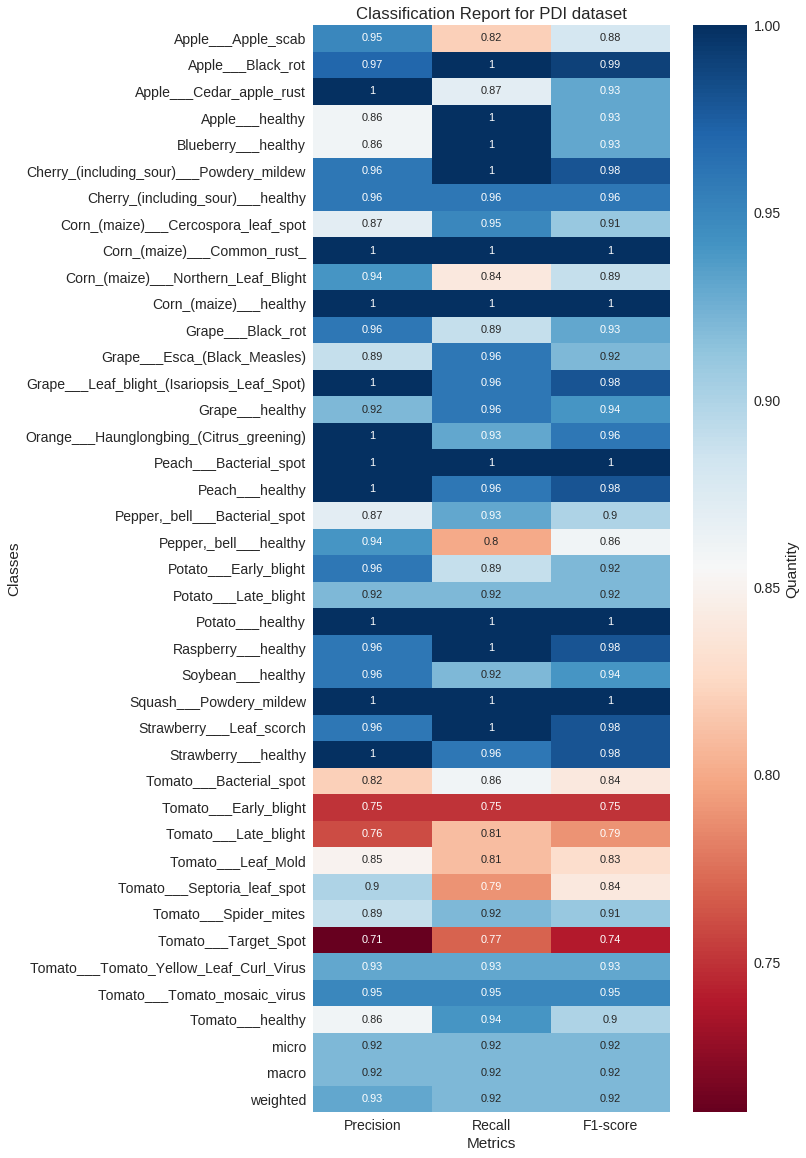

In [0]:
plotClassificationReport(cr)

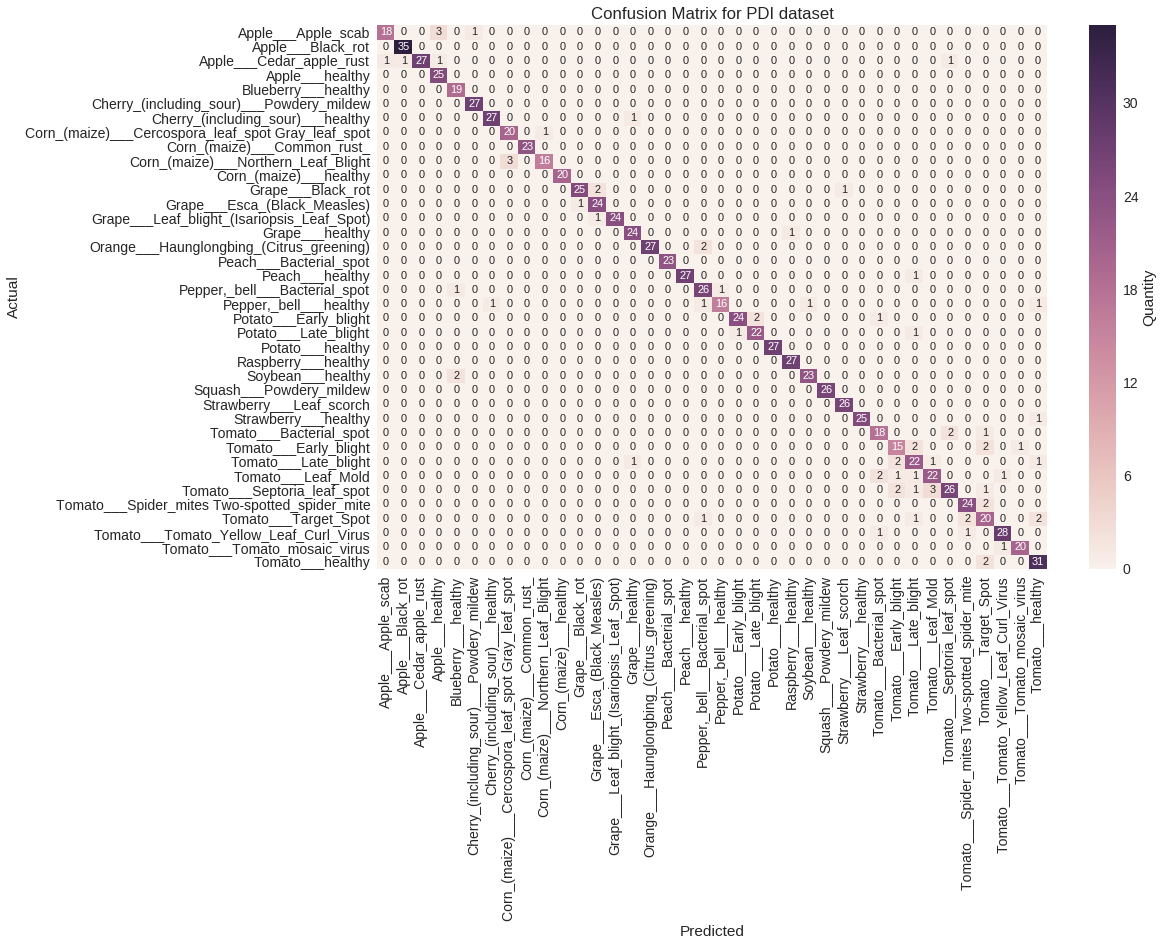

In [0]:
plotConfusionMatrix(Actuals, Predictions, ground_truth_labels)

In [0]:
plotMisclassifiedImages(Actuals, Predictions, test_files, "logs_Inception/bottlenecks")

Output hidden; open in https://colab.research.google.com to view.

## 5 Model Testing

In [0]:
import os

testfiles = [os.path.join("test/", testfile) for testfile in os.listdir("test")]
print(testfiles)

['test/AppleCedarRust1.JPG', 'test/AppleCedarRust2.JPG', 'test/AppleScab2.JPG', 'test/CornCommonRust1.JPG', 'test/CornCommonRust2.JPG', 'test/PotatoEarlyBlight1.JPG', 'test/PotatoEarlyBlight2.JPG', 'test/PotatoHealthy1.JPG', 'test/PotatoHealthy2.JPG', 'test/TomatoEarlyBlight5.JPG', 'test/TomatoEarlyBlight6.JPG', 'test/TomatoHealthy3.JPG', 'test/TomatoYellowCurlVirus1.JPG', 'test/TomatoYellowCurlVirus2.JPG']


In [0]:
if os.path.isfile("logs_Inception/test_results.txt"):
  os.remove("logs_Inception/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_Inception/retrained_graph.pb \
  --image=$testfile \
  --input_layer=Mul \
  --input_height=299 \
  --input_width=299 \
  --labels=logs_Inception/retrained_labels.txt \
  --log_dir=logs_Inception


Evaluation time (1-image): 1.567s

apple cedar apple rust (score=0.95628)
peach healthy (score=0.01232)
peach bacterial spot (score=0.00965)
apple apple scab (score=0.00732)
cherry including sour powdery mildew (score=0.00189)


2019-02-19 00:26:24.969629: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:26:25.398422: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.479s

apple cedar apple rust (score=0.84776)
cherry including sour powdery mildew (score=0.04262)
apple black rot (score=0.03031)
apple healthy (score=0.02924)
peach bacterial spot (score=0.01502)


2019-02-19 00:26:34.683080: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:26:35.075009: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.478s

apple apple scab (score=0.98447)
tomato bacterial spot (score=0.00758)
apple cedar apple rust (score=0.00160)
apple healthy (score=0.00130)
cherry including sour powdery mildew (score=0.00108)


2019-02-19 00:26:44.098186: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:26:44.508099: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.495s

corn maize common rust (score=0.98600)
tomato late blight (score=0.00469)
apple cedar apple rust (score=0.00173)
tomato septoria leaf spot (score=0.00154)
apple apple scab (score=0.00120)


2019-02-19 00:26:53.625601: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:26:54.035917: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.465s

corn maize common rust (score=0.99209)
pepper bell bacterial spot (score=0.00177)
tomato late blight (score=0.00144)
apple apple scab (score=0.00112)
corn maize cercospora leaf spot gray leaf spot (score=0.00107)


2019-02-19 00:27:03.201697: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:27:03.614901: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.611s

potato early blight (score=0.95005)
potato late blight (score=0.04817)
grape leaf blight isariopsis leaf spot (score=0.00064)
strawberry leaf scorch (score=0.00038)
pepper bell bacterial spot (score=0.00023)


2019-02-19 00:27:12.908490: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:27:13.315735: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.594s

potato early blight (score=0.99403)
potato late blight (score=0.00323)
strawberry leaf scorch (score=0.00241)
grape leaf blight isariopsis leaf spot (score=0.00013)
tomato healthy (score=0.00008)


2019-02-19 00:27:23.108410: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:27:23.516668: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.468s

potato healthy (score=0.89372)
potato late blight (score=0.06660)
strawberry healthy (score=0.01335)
blueberry healthy (score=0.00928)
tomato late blight (score=0.00547)


2019-02-19 00:27:33.613417: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:27:34.112146: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.576s

potato healthy (score=0.79661)
potato late blight (score=0.16786)
blueberry healthy (score=0.01603)
soybean healthy (score=0.00682)
tomato late blight (score=0.00306)


2019-02-19 00:27:43.647700: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:27:44.127888: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.629s

tomato early blight (score=0.50230)
tomato septoria leaf spot (score=0.19060)
tomato target spot (score=0.08599)
grape esca black measles (score=0.06980)
grape black rot (score=0.06287)


2019-02-19 00:27:53.780037: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:27:54.256724: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.508s

tomato early blight (score=0.96834)
tomato bacterial spot (score=0.01242)
tomato late blight (score=0.00965)
tomato tomato mosaic virus (score=0.00318)
tomato spider mites two spotted spider mite (score=0.00314)


2019-02-19 00:28:04.359880: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:28:04.892911: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.478s

tomato healthy (score=0.90602)
tomato target spot (score=0.08722)
tomato spider mites two spotted spider mite (score=0.00383)
potato healthy (score=0.00062)
apple apple scab (score=0.00057)


2019-02-19 00:28:14.717216: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:28:15.114438: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.484s

tomato tomato yellow leaf curl virus (score=0.99528)
strawberry healthy (score=0.00107)
tomato tomato mosaic virus (score=0.00076)
tomato spider mites two spotted spider mite (score=0.00057)
tomato leaf mold (score=0.00056)


2019-02-19 00:28:24.342944: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:28:24.744519: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.505s

tomato tomato yellow leaf curl virus (score=0.99922)
tomato early blight (score=0.00033)
tomato tomato mosaic virus (score=0.00017)
tomato spider mites two spotted spider mite (score=0.00008)
tomato leaf mold (score=0.00007)


2019-02-19 00:28:33.852860: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 00:28:34.272047: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [0]:
import pandas as pd

def plotTestResults(log_dir):
  df = pd.DataFrame()

  with open(log_dir + "/test_results.txt") as tr:  
     line = tr.readline()
     cnt = -1
     while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        if line.startswith("Test File"):
          cnt = cnt + 1
          filename = line.split(": ")[1].strip()
        elif(line.startswith("Result")):
          disease = line.split(":")[1].split("(score=")[0]
          confidence = line.split(":")[1].split("(score=")[1].split(")")[0]
          df = df.append({'test_file' : filename , 'disease' : disease, 'confidence' : confidence} , ignore_index=True)
        line = tr.readline()   

  df['confidence'] = df['confidence'].astype('float64') 
  df['test_file'] = df['test_file'].astype('str') 
  df['disease'] = df['disease'].astype('str') 

  test_files = df.test_file.unique()

  for test_file in test_files:
    ax = df[df['test_file'] == test_file][['confidence']].plot(kind='bar', title =test_file,figsize=(6,4),legend=True, fontsize=12)
    ax.set_xticklabels(df[df['test_file'] == test_file].disease)
    ax.set_xlabel("disease",fontsize=12)
    ax.set_ylabel("confidence",fontsize=12)
    ax.set_facecolor("white")

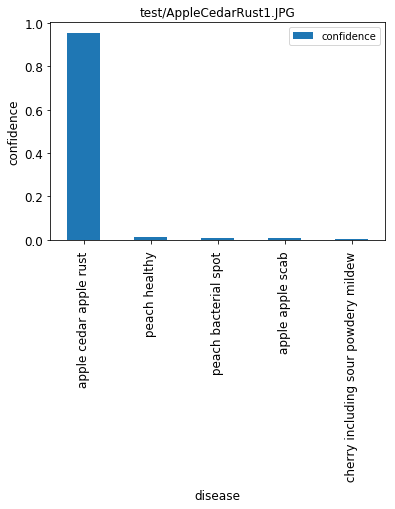

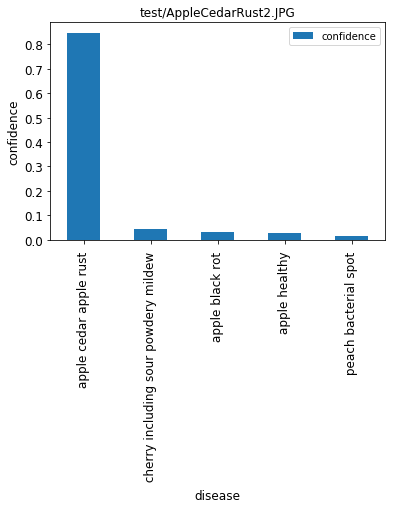

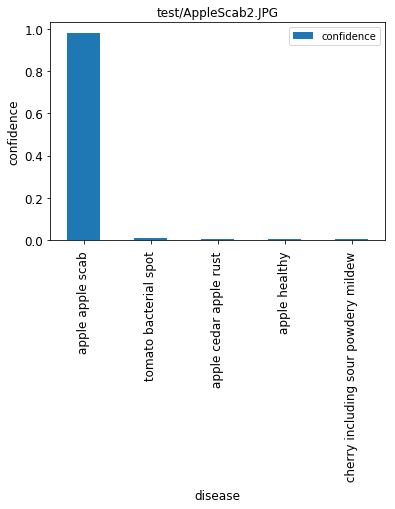

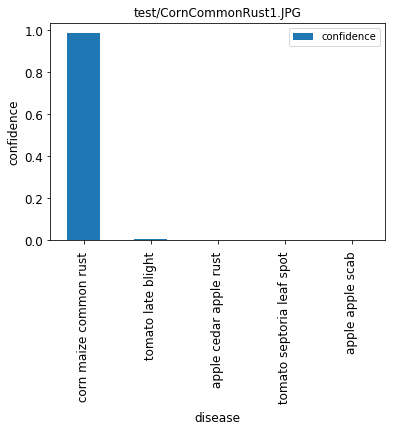

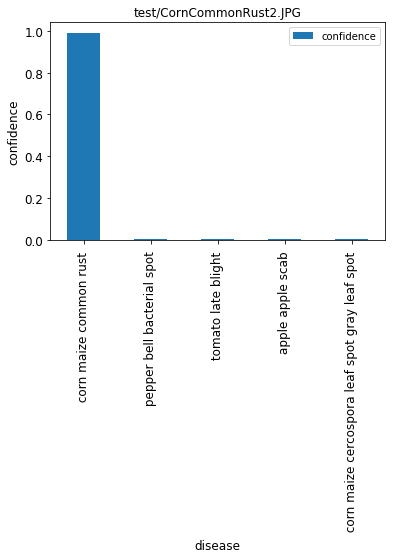

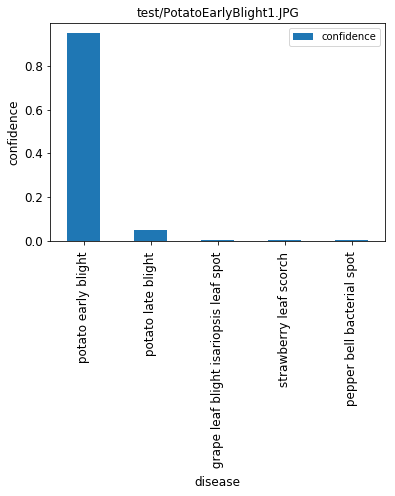

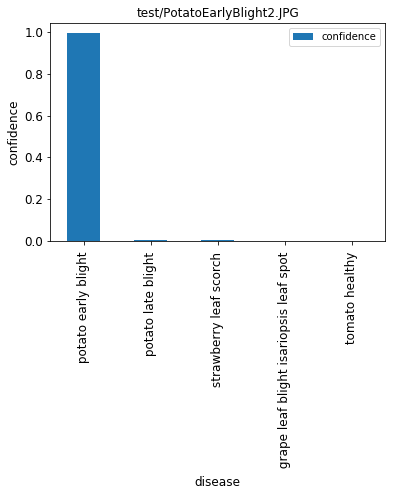

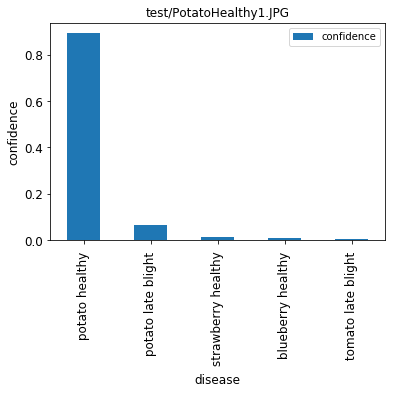

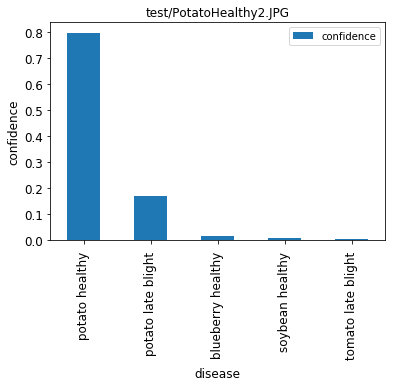

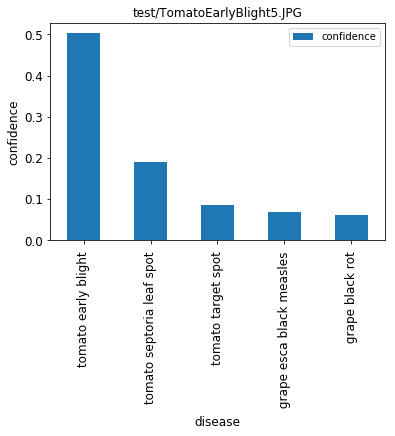

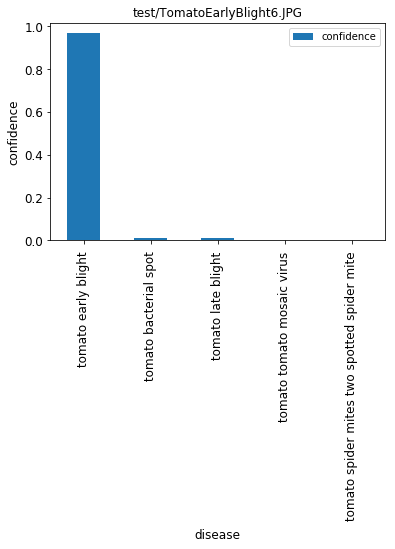

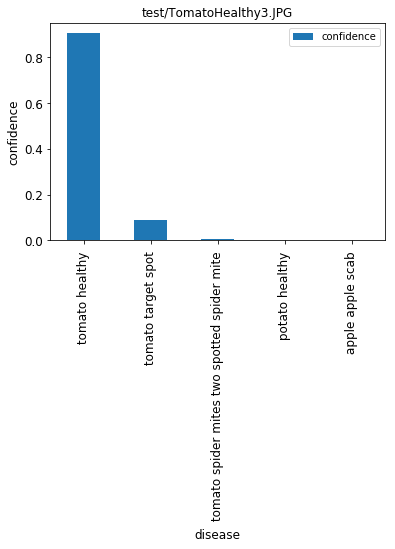

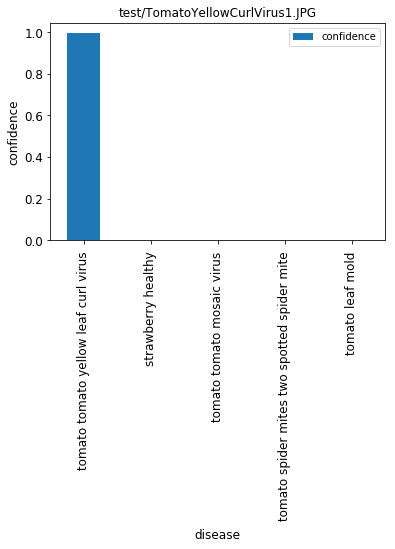

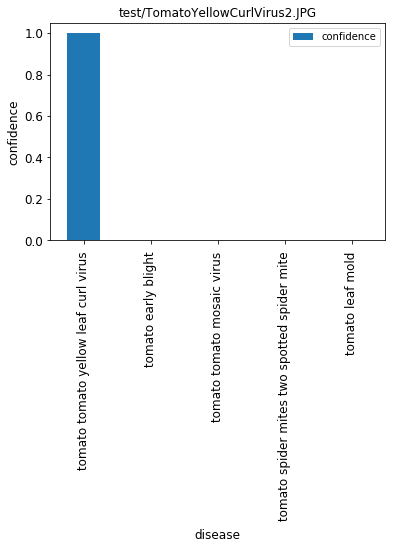

In [0]:
plotTestResults("logs_Inception")

## 6 Alternative Model

### 6.1 MobileNet_v1_1.0_224

#### 6.1.1 Model Training

In [0]:
!python -m retrain \
--architecture=MobileNet_1.0_224 \
--bottleneck_dir=logs_MobileNet/bottlenecks \
--how_many_training_steps=20000 \
--train_batch_size=100 \
--learning_rate=0.01 \
--model_dir=logs_MobileNet/models/ \
--summaries_dir=logs_MobileNet/training_summaries/ \
--output_graph=logs_MobileNet/retrained_graph.pb \
--output_labels=logs_MobileNet/retrained_labels.txt \
--image_dir=train \
--log_dir=logs_MobileNet \
--print_misclassified_test_images

Output hidden; open in https://colab.research.google.com to view.

#### 6.1.2 Model Evaluation

In [0]:
Actuals, Predictions, test_files = getTestResults("logs_MobileNet")

In [0]:
print("Accuracy", accuracy_score(Actuals, Predictions))

Accuracy 0.9445015416238438


In [0]:
ground_truth_labels = sorted(os.listdir("logs_MobileNet/bottlenecks"))
cr = printClassificationReport(Actuals, Predictions, ground_truth_labels)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.95      0.93        22
                                 Apple___Black_rot       1.00      1.00      1.00        35
                          Apple___Cedar_apple_rust       0.94      0.97      0.95        31
                                   Apple___healthy       0.96      1.00      0.98        25
                               Blueberry___healthy       1.00      1.00      1.00        19
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00        27
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98        28
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.90      0.95        21
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98        23
               Corn_(maize)___Northern_Leaf_Blight       0.95      1.00      0.

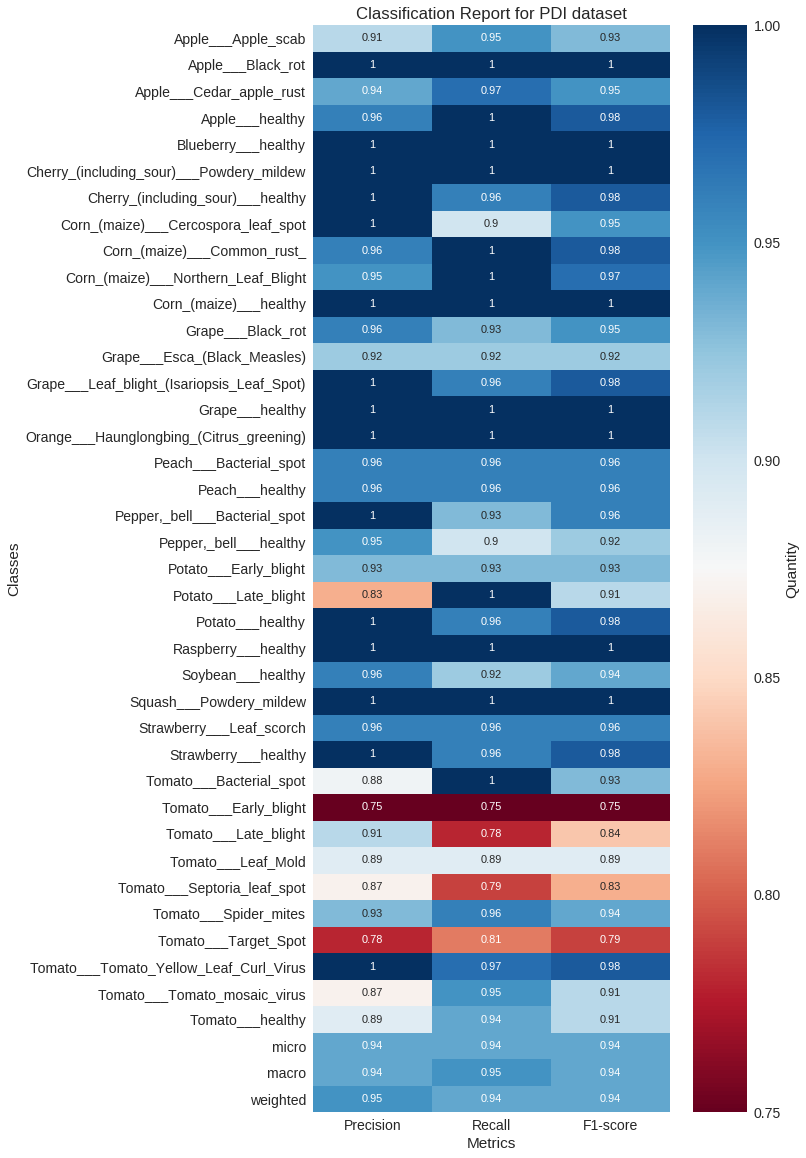

In [0]:
plotClassificationReport(cr)

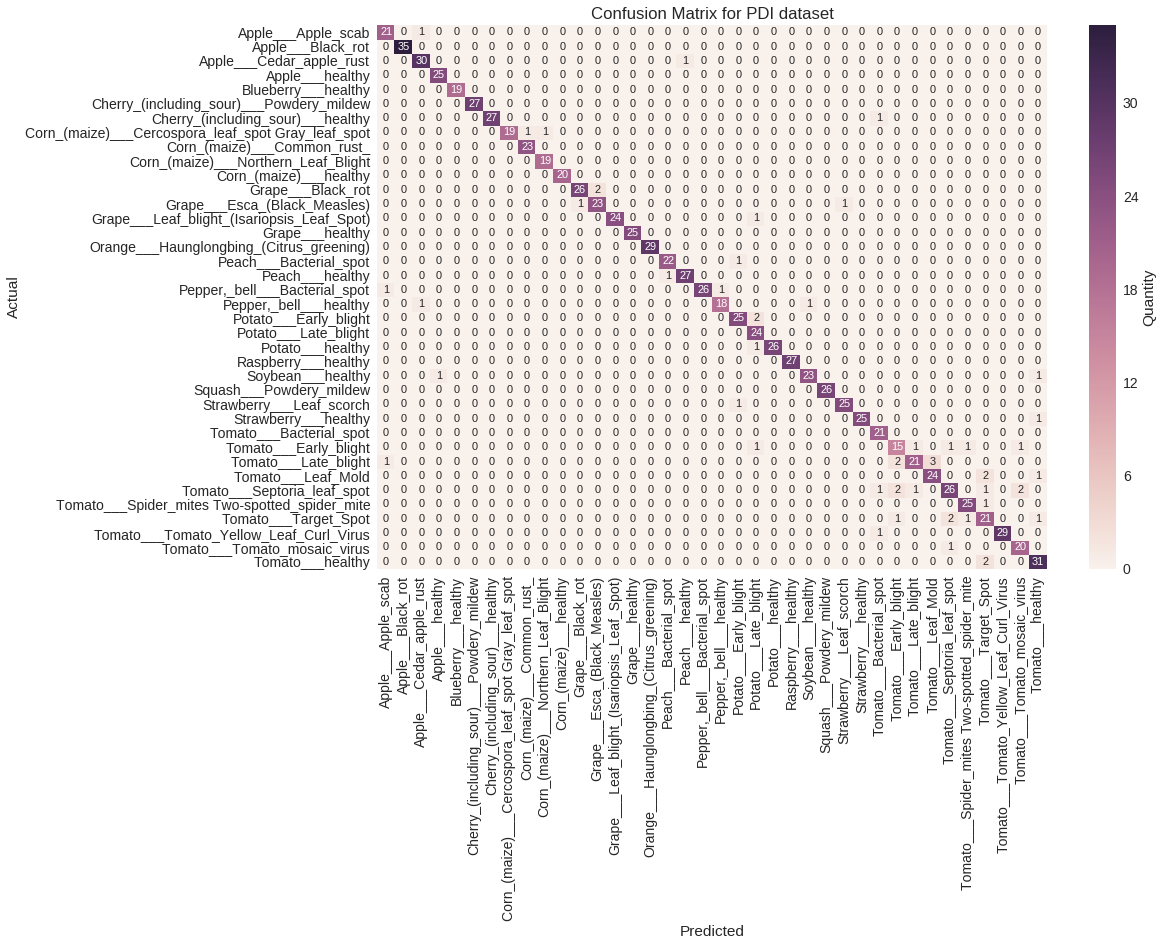

In [0]:
plotConfusionMatrix(Actuals, Predictions, ground_truth_labels)

In [0]:
plotMisclassifiedImages(Actuals, Predictions, test_files, "logs_MobileNet/bottlenecks")

Output hidden; open in https://colab.research.google.com to view.

#### 6.1.3 Model Testing

In [0]:
if os.path.isfile("logs_MobileNet/test_results.txt"):
  os.remove("logs_MobileNet/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_MobileNet/retrained_graph.pb \
  --image=$testfile \
  --input_layer=input \
  --input_height=224 \
  --input_width=224 \
  --labels=logs_MobileNet/retrained_labels.txt \
  --log_dir=logs_MobileNet


Evaluation time (1-image): 1.543s

apple cedar apple rust (score=0.99987)
apple black rot (score=0.00004)
apple apple scab (score=0.00004)
peach healthy (score=0.00002)
blueberry healthy (score=0.00002)


2019-02-19 00:46:45.362005: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.518s

apple cedar apple rust (score=0.99834)
corn maize cercospora leaf spot gray leaf spot (score=0.00094)
cherry including sour healthy (score=0.00065)
tomato spider mites two spotted spider mite (score=0.00002)
potato late blight (score=0.00002)


2019-02-19 00:46:54.912576: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.574s

apple apple scab (score=0.99997)
squash powdery mildew (score=0.00002)
apple black rot (score=0.00001)
peach bacterial spot (score=0.00000)
apple cedar apple rust (score=0.00000)


2019-02-19 00:47:04.172861: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.745s

corn maize common rust (score=0.99999)
apple apple scab (score=0.00001)
corn maize northern leaf blight (score=0.00000)
squash powdery mildew (score=0.00000)
peach healthy (score=0.00000)


2019-02-19 00:47:13.812370: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.469s

corn maize common rust (score=1.00000)
corn maize cercospora leaf spot gray leaf spot (score=0.00000)
apple apple scab (score=0.00000)
tomato target spot (score=0.00000)
peach healthy (score=0.00000)


2019-02-19 00:47:23.465312: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.696s

potato early blight (score=0.99330)
potato late blight (score=0.00670)
strawberry leaf scorch (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)
apple apple scab (score=0.00000)


2019-02-19 00:47:32.697262: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.548s

potato early blight (score=0.99998)
potato late blight (score=0.00002)
grape leaf blight isariopsis leaf spot (score=0.00000)
apple apple scab (score=0.00000)
potato healthy (score=0.00000)


2019-02-19 00:47:41.676896: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.536s

potato healthy (score=0.99689)
soybean healthy (score=0.00243)
potato late blight (score=0.00045)
pepper bell healthy (score=0.00022)
blueberry healthy (score=0.00001)


2019-02-19 00:47:50.908975: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.619s

potato healthy (score=0.99902)
soybean healthy (score=0.00080)
pepper bell healthy (score=0.00014)
potato late blight (score=0.00005)
potato early blight (score=0.00000)


2019-02-19 00:48:00.732803: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.724s

tomato early blight (score=0.81711)
tomato septoria leaf spot (score=0.16082)
tomato target spot (score=0.01963)
tomato late blight (score=0.00145)
tomato bacterial spot (score=0.00054)


2019-02-19 00:48:10.566949: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.630s

tomato early blight (score=0.99484)
tomato leaf mold (score=0.00248)
tomato tomato mosaic virus (score=0.00163)
apple healthy (score=0.00061)
tomato late blight (score=0.00033)


2019-02-19 00:48:20.163458: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.715s

tomato healthy (score=0.99992)
tomato target spot (score=0.00008)
tomato tomato mosaic virus (score=0.00000)
tomato spider mites two spotted spider mite (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)


2019-02-19 00:48:30.582544: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.665s

tomato tomato yellow leaf curl virus (score=0.99892)
tomato tomato mosaic virus (score=0.00083)
tomato leaf mold (score=0.00023)
tomato late blight (score=0.00001)
tomato early blight (score=0.00000)


2019-02-19 00:48:40.364314: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.674s

tomato tomato yellow leaf curl virus (score=1.00000)
tomato spider mites two spotted spider mite (score=0.00000)
tomato early blight (score=0.00000)
tomato leaf mold (score=0.00000)
tomato late blight (score=0.00000)


2019-02-19 00:48:50.292973: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


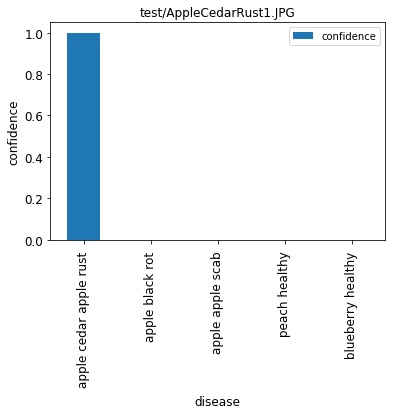

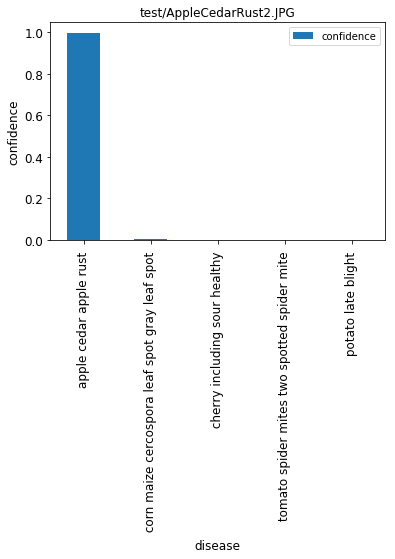

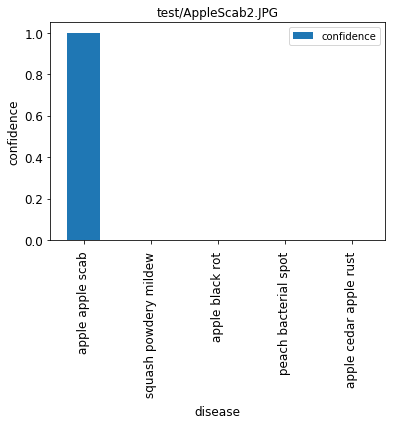

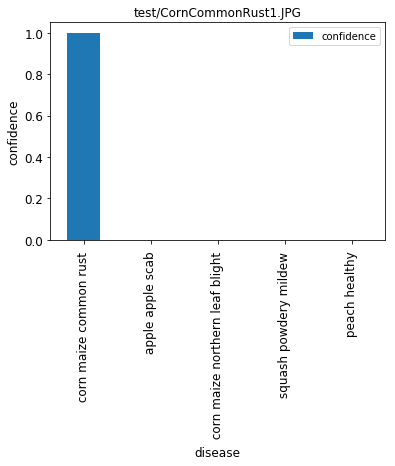

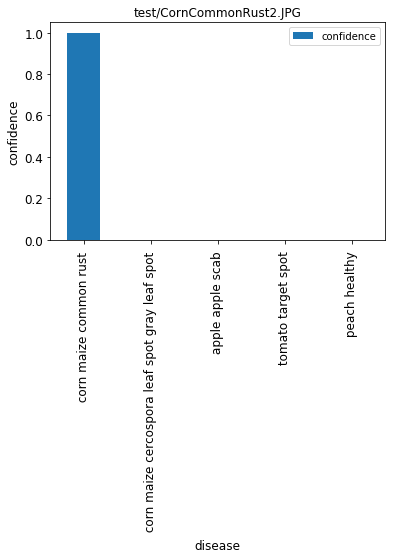

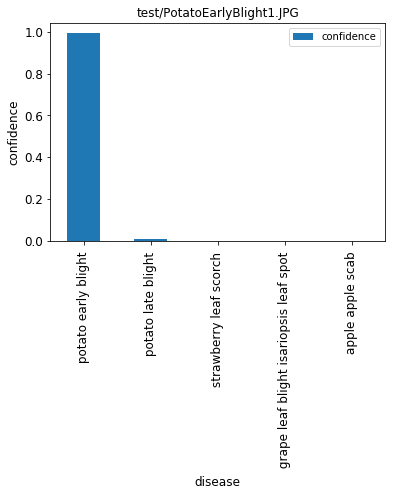

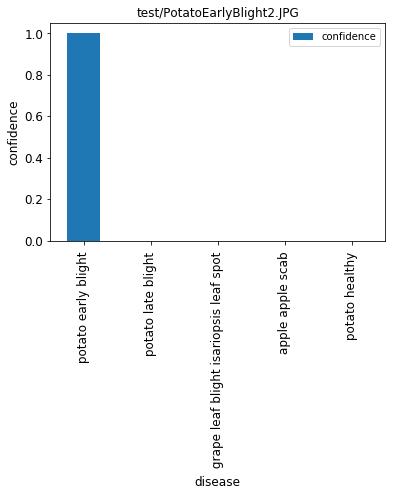

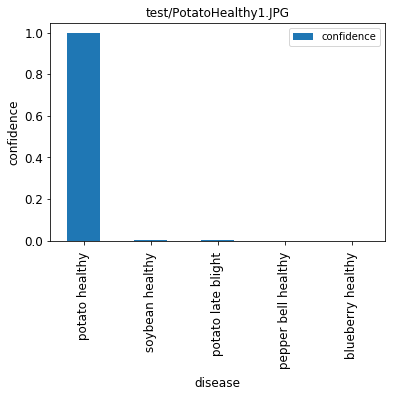

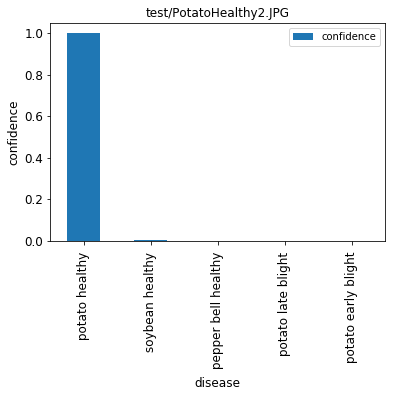

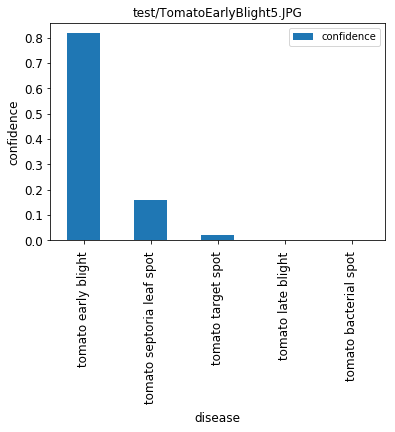

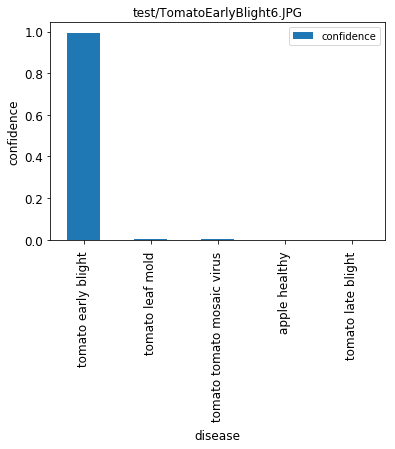

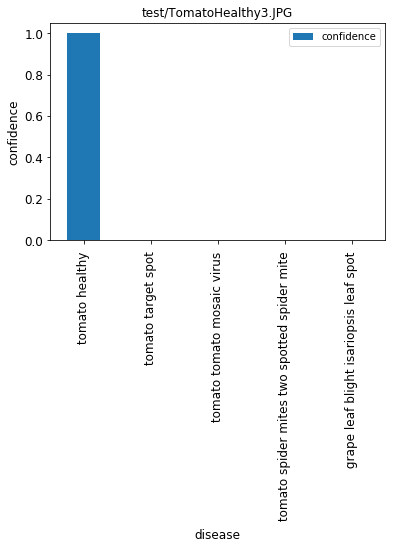

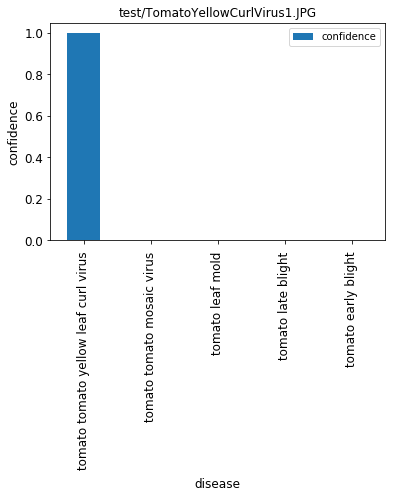

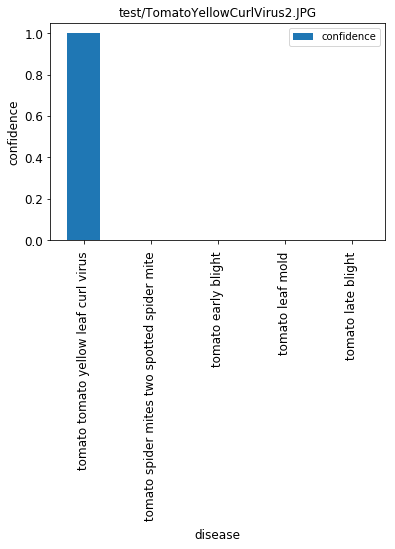

In [0]:
plotTestResults("logs_MobileNet")

### 6.2 MobileNet (Batch Size = 50)


#### 6.2.1 Model Training

In [0]:
!python -m retrain \
--architecture=MobileNet_1.0_224 \
--bottleneck_dir=logs_MobileNet_BS50/bottlenecks \
--how_many_training_steps=20000 \
--train_batch_size=50 \
--learning_rate=0.01 \
--model_dir=logs_MobileNet_BS50/models/ \
--summaries_dir=logs_MobileNet_BS50/training_summaries/ \
--output_graph=logs_MobileNet_BS50/retrained_graph.pb \
--output_labels=logs_MobileNet_BS50/retrained_labels.txt \
--image_dir=train \
--log_dir=logs_MobileNet_BS50 \
--print_misclassified_test_images

Output hidden; open in https://colab.research.google.com to view.

#### 6.2.2 Model Evaluation

In [0]:
Actuals, Predictions, test_files = getTestResults("logs_MobileNet_BS50")

In [0]:
print("Accuracy", accuracy_score(Actuals, Predictions))

Accuracy 0.9414182939362795


In [0]:
ground_truth_labels = sorted(os.listdir("logs_MobileNet_BS50/bottlenecks"))
cr = printClassificationReport(Actuals, Predictions, ground_truth_labels)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.95      0.93        22
                                 Apple___Black_rot       1.00      1.00      1.00        35
                          Apple___Cedar_apple_rust       0.94      0.97      0.95        31
                                   Apple___healthy       0.96      1.00      0.98        25
                               Blueberry___healthy       1.00      1.00      1.00        19
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00        27
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98        28
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.90      0.95        21
                       Corn_(maize)___Common_rust_       0.96      0.96      0.96        23
               Corn_(maize)___Northern_Leaf_Blight       0.90      1.00      0.

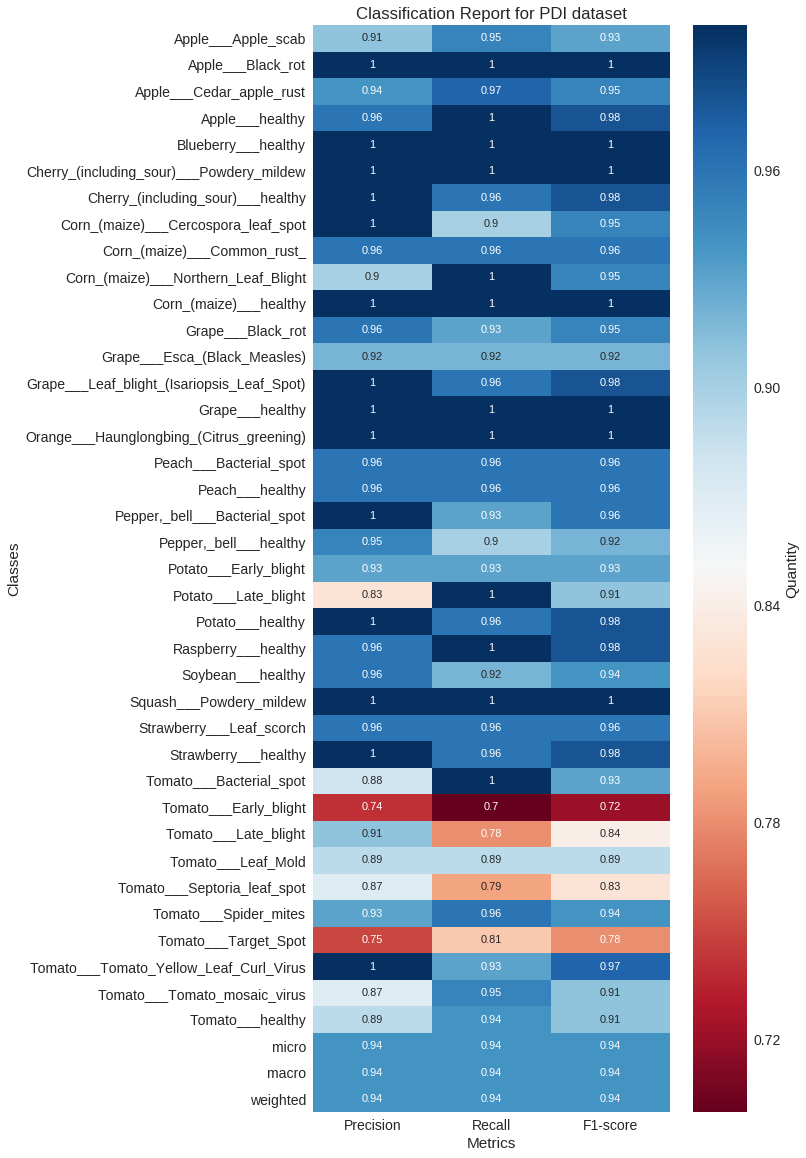

In [0]:
plotClassificationReport(cr)

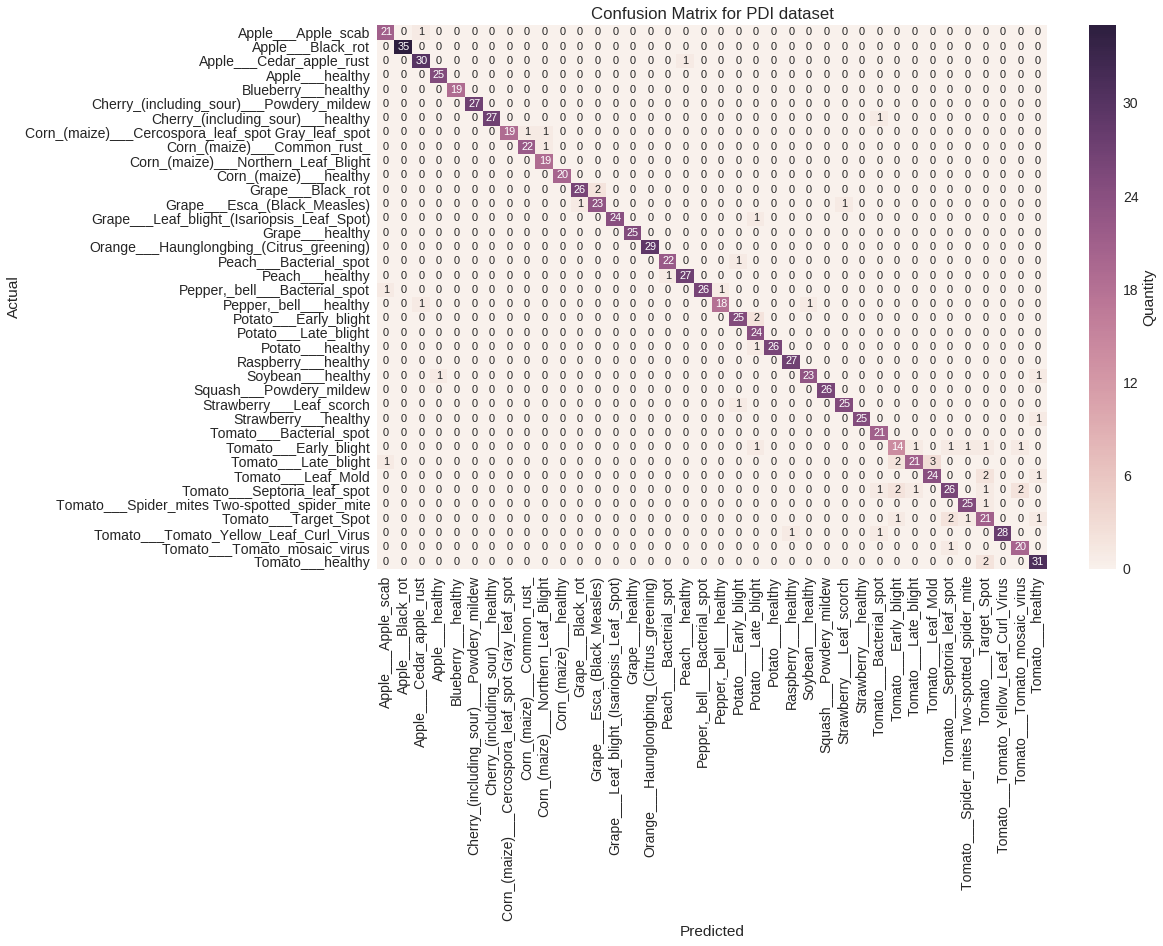

In [0]:
plotConfusionMatrix(Actuals, Predictions, ground_truth_labels)

In [0]:
plotMisclassifiedImages(Actuals, Predictions, test_files, "logs_MobileNet_BS50/bottlenecks")

Output hidden; open in https://colab.research.google.com to view.

#### 6.2.3 Model Testing

In [0]:
import os
if os.path.isfile("logs_MobileNet_BS50/test_results.txt"):
  os.remove("logs_MobileNet_BS50/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_MobileNet_BS50/retrained_graph.pb \
  --image=$testfile \
  --input_layer=input \
  --input_height=224 \
  --input_width=224 \
  --labels=logs_MobileNet_BS50/retrained_labels.txt \
  --log_dir=logs_MobileNet_BS50


Evaluation time (1-image): 1.371s

apple cedar apple rust (score=0.99984)
apple black rot (score=0.00005)
apple apple scab (score=0.00005)
blueberry healthy (score=0.00002)
peach healthy (score=0.00002)


2019-02-19 12:04:39.466076: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.256s

apple cedar apple rust (score=0.99821)
corn maize cercospora leaf spot gray leaf spot (score=0.00098)
cherry including sour healthy (score=0.00074)
tomato spider mites two spotted spider mite (score=0.00002)
potato late blight (score=0.00002)


2019-02-19 12:04:47.209276: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.417s

apple apple scab (score=0.99997)
squash powdery mildew (score=0.00002)
apple black rot (score=0.00000)
peach bacterial spot (score=0.00000)
apple cedar apple rust (score=0.00000)


2019-02-19 12:04:54.391324: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.276s

corn maize common rust (score=0.99999)
apple apple scab (score=0.00001)
corn maize northern leaf blight (score=0.00000)
squash powdery mildew (score=0.00000)
peach healthy (score=0.00000)


2019-02-19 12:05:01.407275: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.219s

corn maize common rust (score=1.00000)
corn maize cercospora leaf spot gray leaf spot (score=0.00000)
apple apple scab (score=0.00000)
tomato target spot (score=0.00000)
peach healthy (score=0.00000)


2019-02-19 12:05:08.302992: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.155s

potato early blight (score=0.99074)
potato late blight (score=0.00926)
strawberry leaf scorch (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)
apple apple scab (score=0.00000)


2019-02-19 12:05:14.947114: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.227s

potato early blight (score=0.99998)
potato late blight (score=0.00002)
grape leaf blight isariopsis leaf spot (score=0.00000)
apple apple scab (score=0.00000)
potato healthy (score=0.00000)


2019-02-19 12:05:21.675051: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.127s

potato healthy (score=0.99690)
soybean healthy (score=0.00240)
potato late blight (score=0.00043)
pepper bell healthy (score=0.00025)
blueberry healthy (score=0.00001)


2019-02-19 12:05:28.366774: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.216s

potato healthy (score=0.99902)
soybean healthy (score=0.00077)
pepper bell healthy (score=0.00017)
potato late blight (score=0.00004)
potato early blight (score=0.00000)


2019-02-19 12:05:34.943651: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.245s

tomato early blight (score=0.88958)
tomato septoria leaf spot (score=0.09008)
tomato target spot (score=0.01840)
tomato late blight (score=0.00108)
tomato bacterial spot (score=0.00049)


2019-02-19 12:05:41.632196: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.362s

tomato early blight (score=0.99524)
tomato tomato mosaic virus (score=0.00210)
tomato leaf mold (score=0.00179)
apple healthy (score=0.00050)
tomato late blight (score=0.00026)


2019-02-19 12:05:49.729307: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.272s

tomato healthy (score=0.99992)
tomato target spot (score=0.00008)
tomato spider mites two spotted spider mite (score=0.00000)
tomato tomato mosaic virus (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)


2019-02-19 12:05:57.332499: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.275s

tomato tomato yellow leaf curl virus (score=0.99863)
tomato tomato mosaic virus (score=0.00108)
tomato leaf mold (score=0.00028)
tomato late blight (score=0.00001)
tomato early blight (score=0.00000)


2019-02-19 12:06:05.015246: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.472s

tomato tomato yellow leaf curl virus (score=1.00000)
tomato spider mites two spotted spider mite (score=0.00000)
tomato early blight (score=0.00000)
tomato leaf mold (score=0.00000)
tomato late blight (score=0.00000)


2019-02-19 12:06:12.798197: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


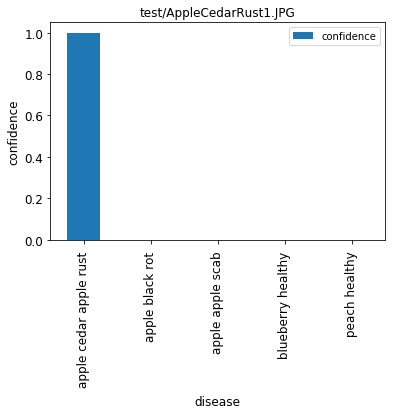

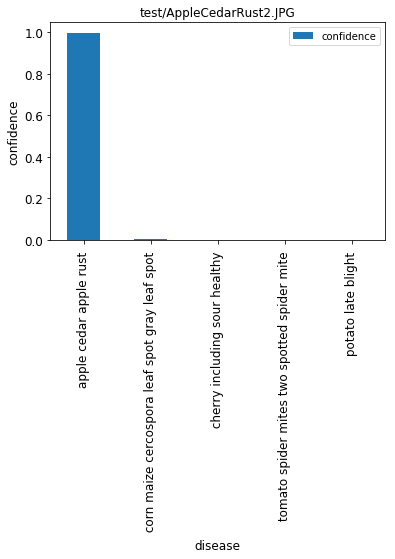

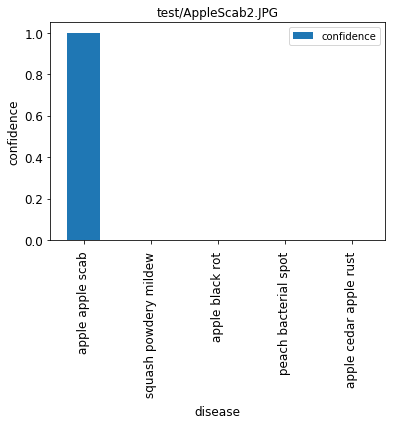

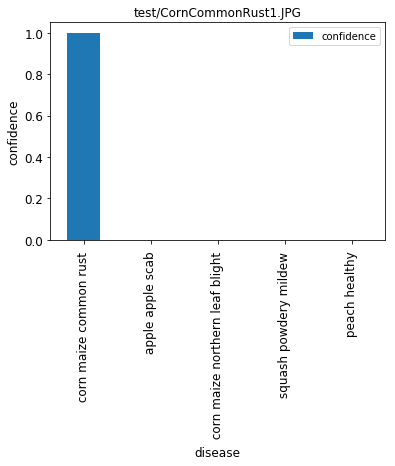

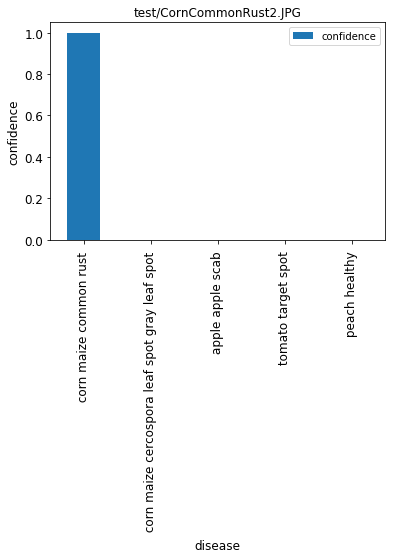

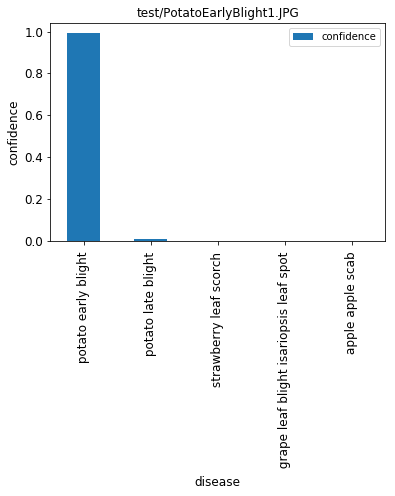

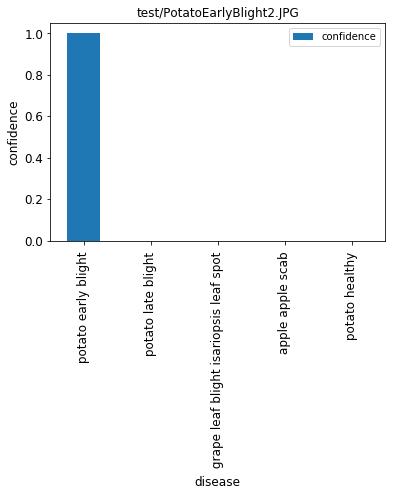

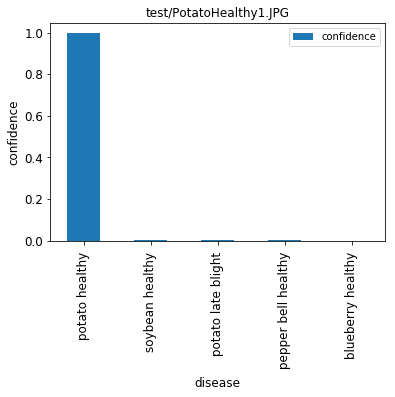

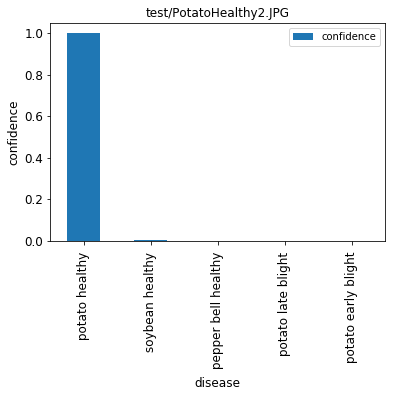

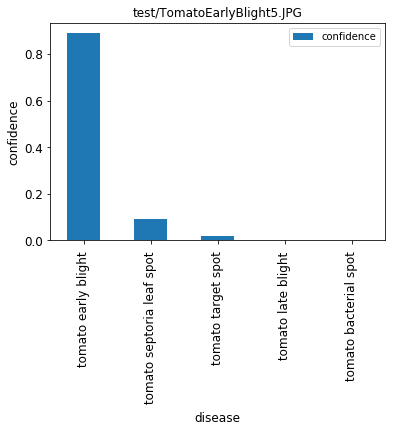

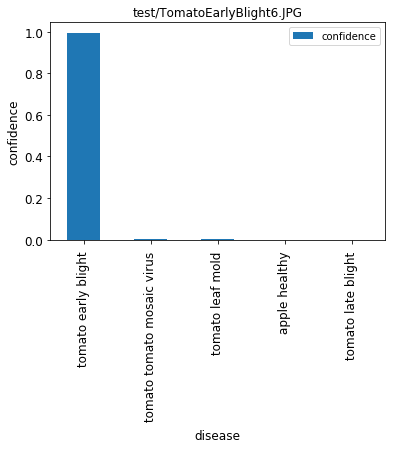

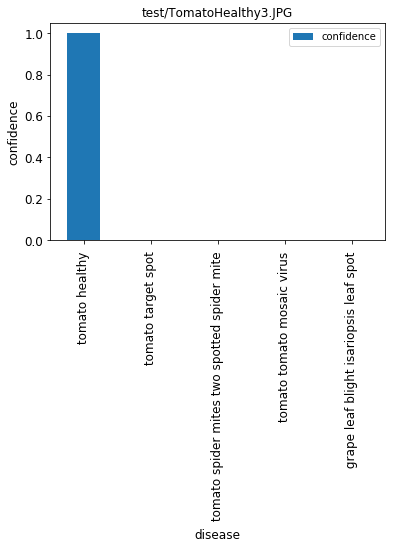

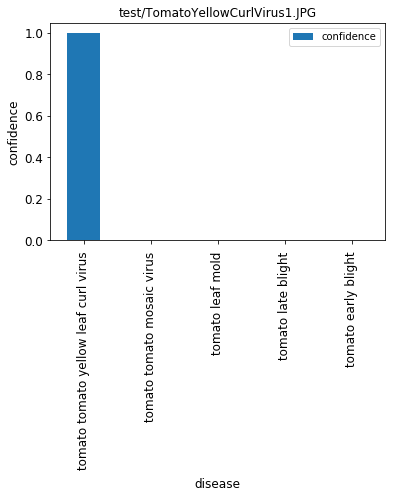

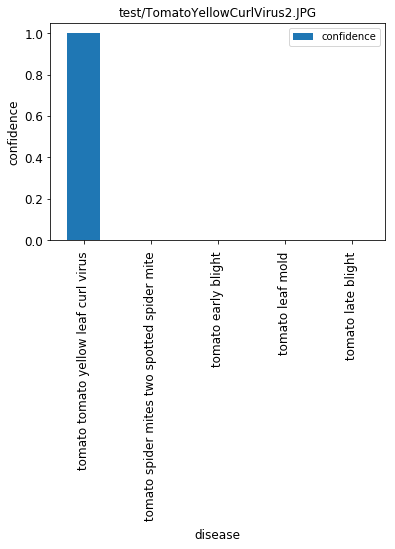

In [0]:
plotTestResults("logs_MobileNet_BS50")

### 6.3 MobileNet (Batch Size = 200)

#### 6.3.1 Model Training

In [0]:
!python -m retrain \
--architecture=MobileNet_1.0_224 \
--bottleneck_dir=logs_MobileNet_BS200/bottlenecks \
--how_many_training_steps=20000 \
--train_batch_size=200 \
--learning_rate=0.01 \
--model_dir=logs_MobileNet_BS200/models/ \
--summaries_dir=logs_MobileNet_BS200/training_summaries/ \
--output_graph=logs_MobileNet_BS200/retrained_graph.pb \
--output_labels=logs_MobileNet_BS200/retrained_labels.txt \
--image_dir=train \
--log_dir=logs_MobileNet_BS200 \
--print_misclassified_test_images

Output hidden; open in https://colab.research.google.com to view.

#### 6.3.2 Model Evaluation

In [0]:
Actuals, Predictions, test_files = getTestResults("logs_MobileNet_BS200")

In [0]:
print("Accuracy", accuracy_score(Actuals, Predictions))

Accuracy 0.9434737923946557


In [0]:
ground_truth_labels = sorted(os.listdir("logs_MobileNet_BS200/bottlenecks"))
cr = printClassificationReport(Actuals, Predictions, ground_truth_labels)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.95      0.93        22
                                 Apple___Black_rot       1.00      1.00      1.00        35
                          Apple___Cedar_apple_rust       0.94      0.97      0.95        31
                                   Apple___healthy       0.96      1.00      0.98        25
                               Blueberry___healthy       1.00      1.00      1.00        19
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00        27
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98        28
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.90      0.95        21
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98        23
               Corn_(maize)___Northern_Leaf_Blight       0.95      1.00      0.

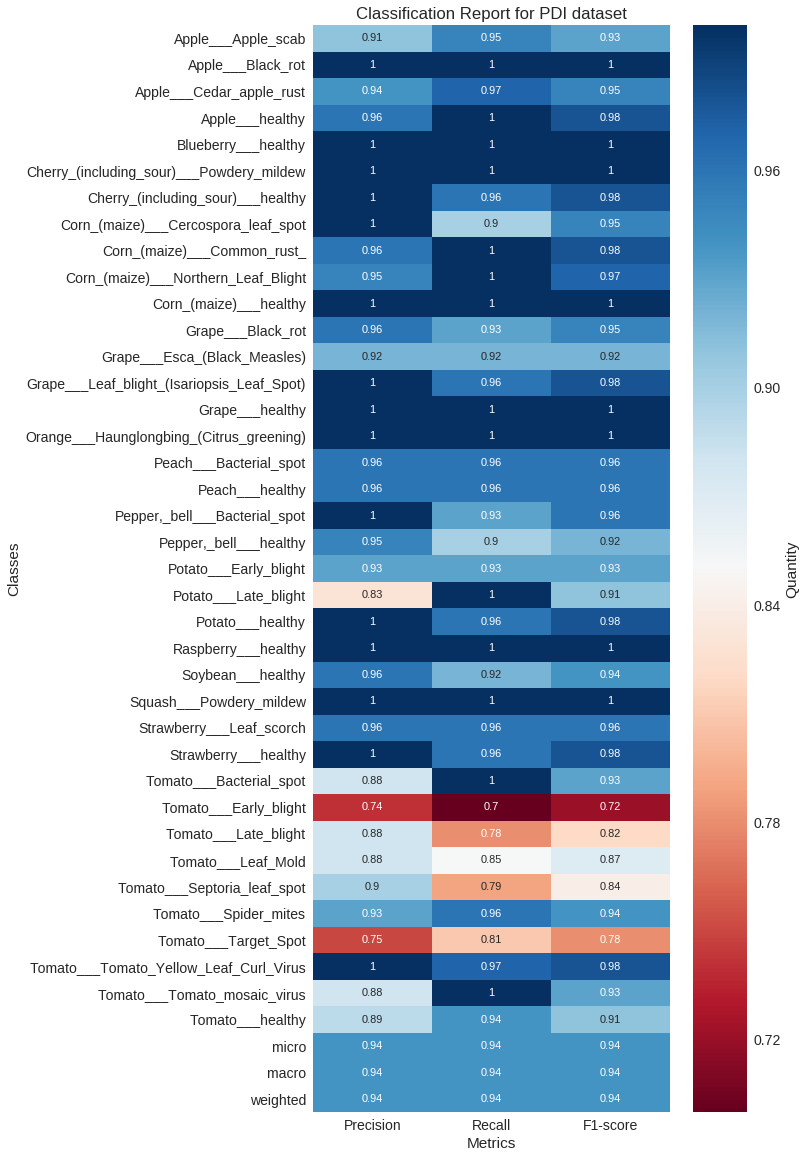

In [0]:
plotClassificationReport(cr)

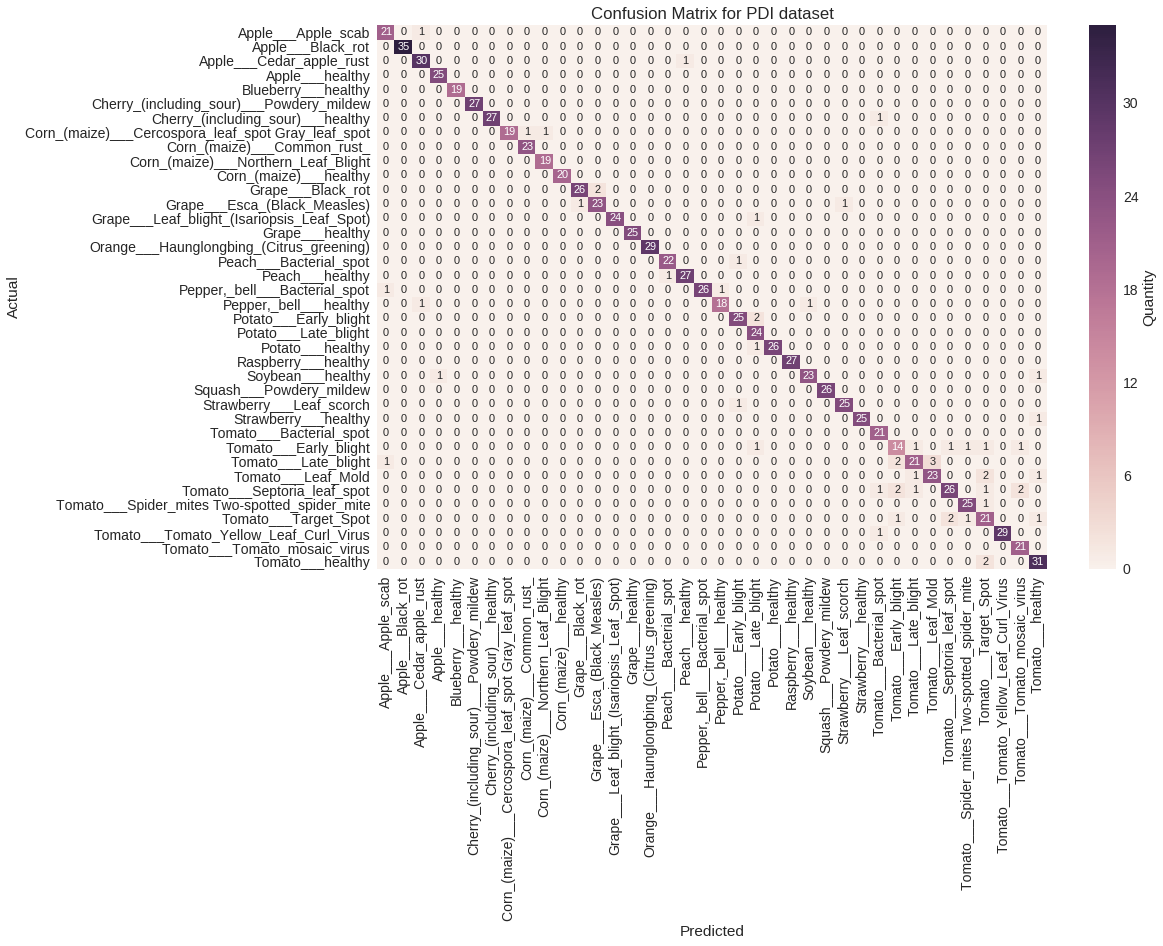

In [0]:
plotConfusionMatrix(Actuals, Predictions, ground_truth_labels)

In [0]:
plotMisclassifiedImages(Actuals, Predictions, test_files, "logs_MobileNet_BS200/bottlenecks")

Output hidden; open in https://colab.research.google.com to view.

#### 6.3.3 Model Testing

In [0]:
import os
if os.path.isfile("logs_MobileNet_BS200/test_results.txt"):
  os.remove("logs_MobileNet_BS200/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_MobileNet_BS200/retrained_graph.pb \
  --image=$testfile \
  --input_layer=input \
  --input_height=224 \
  --input_width=224 \
  --labels=logs_MobileNet_BS200/retrained_labels.txt \
  --log_dir=logs_MobileNet_BS200


Evaluation time (1-image): 1.107s

apple cedar apple rust (score=0.99988)
apple apple scab (score=0.00004)
apple black rot (score=0.00004)
blueberry healthy (score=0.00002)
peach healthy (score=0.00001)


2019-02-19 12:21:29.439723: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.129s

apple cedar apple rust (score=0.99805)
corn maize cercospora leaf spot gray leaf spot (score=0.00111)
cherry including sour healthy (score=0.00077)
tomato spider mites two spotted spider mite (score=0.00002)
potato late blight (score=0.00002)


2019-02-19 12:21:35.581985: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.101s

apple apple scab (score=0.99997)
squash powdery mildew (score=0.00002)
apple black rot (score=0.00001)
peach bacterial spot (score=0.00000)
apple cedar apple rust (score=0.00000)


2019-02-19 12:21:41.803302: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.131s

corn maize common rust (score=0.99999)
apple apple scab (score=0.00001)
corn maize northern leaf blight (score=0.00000)
squash powdery mildew (score=0.00000)
peach healthy (score=0.00000)


2019-02-19 12:21:48.157208: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.089s

corn maize common rust (score=1.00000)
corn maize cercospora leaf spot gray leaf spot (score=0.00000)
apple apple scab (score=0.00000)
tomato target spot (score=0.00000)
orange haunglongbing citrus greening (score=0.00000)


2019-02-19 12:21:54.303236: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.126s

potato early blight (score=0.99238)
potato late blight (score=0.00762)
strawberry leaf scorch (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)
apple apple scab (score=0.00000)


2019-02-19 12:22:00.383814: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.098s

potato early blight (score=0.99998)
potato late blight (score=0.00002)
grape leaf blight isariopsis leaf spot (score=0.00000)
apple apple scab (score=0.00000)
potato healthy (score=0.00000)


2019-02-19 12:22:06.516818: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.100s

potato healthy (score=0.99670)
soybean healthy (score=0.00256)
potato late blight (score=0.00051)
pepper bell healthy (score=0.00023)
blueberry healthy (score=0.00001)


2019-02-19 12:22:12.732224: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.094s

potato healthy (score=0.99898)
soybean healthy (score=0.00082)
pepper bell healthy (score=0.00014)
potato late blight (score=0.00005)
potato early blight (score=0.00000)


2019-02-19 12:22:18.910684: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.110s

tomato early blight (score=0.83061)
tomato septoria leaf spot (score=0.14162)
tomato target spot (score=0.02489)
tomato late blight (score=0.00169)
tomato bacterial spot (score=0.00064)


2019-02-19 12:22:25.043364: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.114s

tomato early blight (score=0.99476)
tomato leaf mold (score=0.00212)
tomato tomato mosaic virus (score=0.00182)
apple healthy (score=0.00074)
tomato late blight (score=0.00041)


2019-02-19 12:22:31.264440: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.102s

tomato healthy (score=0.99991)
tomato target spot (score=0.00008)
tomato spider mites two spotted spider mite (score=0.00000)
tomato tomato mosaic virus (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)


2019-02-19 12:22:37.408702: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.316s

tomato tomato yellow leaf curl virus (score=0.99870)
tomato tomato mosaic virus (score=0.00105)
tomato leaf mold (score=0.00023)
tomato late blight (score=0.00001)
tomato early blight (score=0.00000)


2019-02-19 12:22:44.061902: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.148s

tomato tomato yellow leaf curl virus (score=1.00000)
tomato spider mites two spotted spider mite (score=0.00000)
tomato early blight (score=0.00000)
tomato late blight (score=0.00000)
tomato leaf mold (score=0.00000)


2019-02-19 12:22:50.659341: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


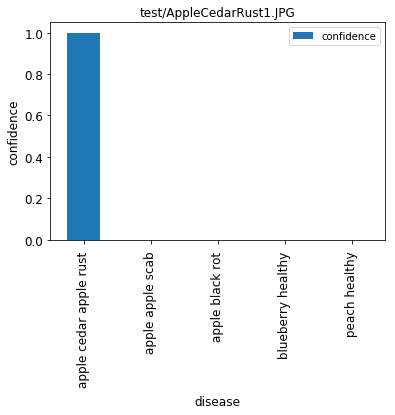

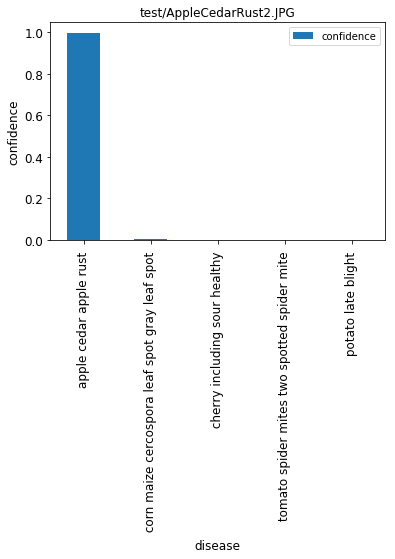

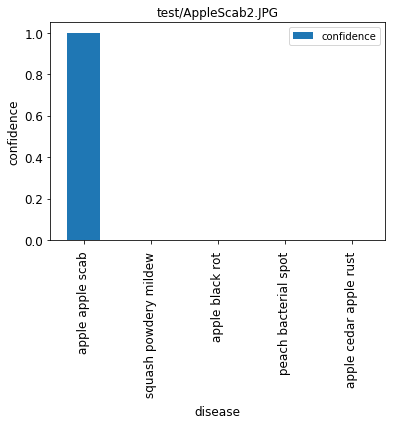

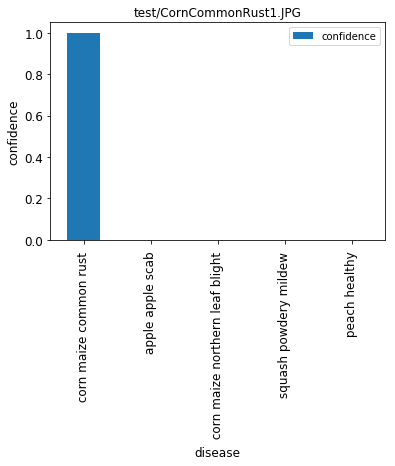

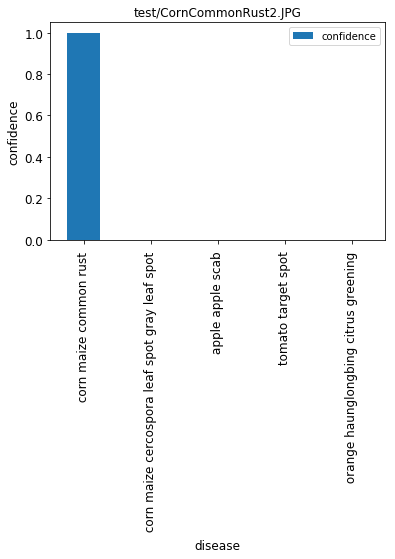

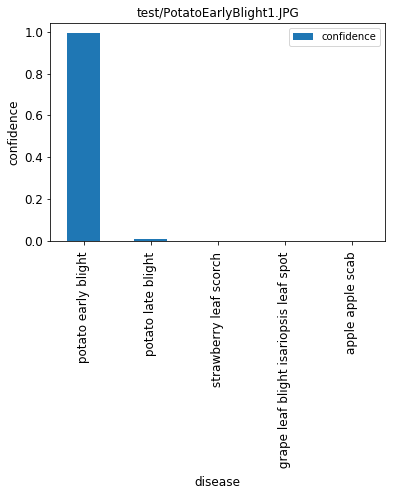

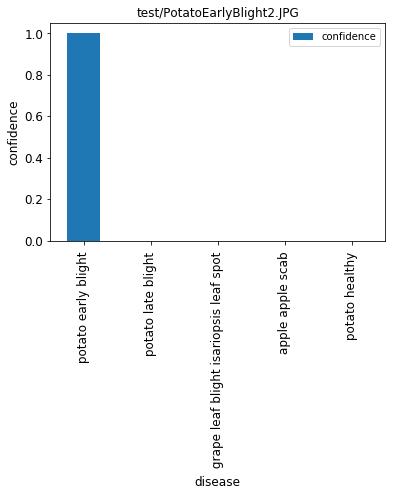

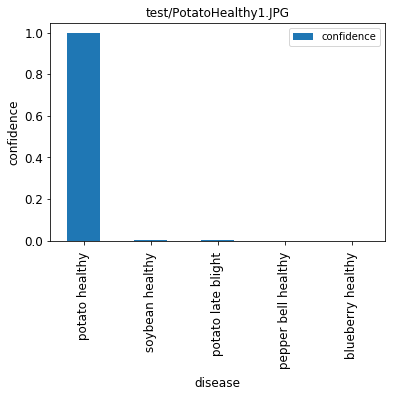

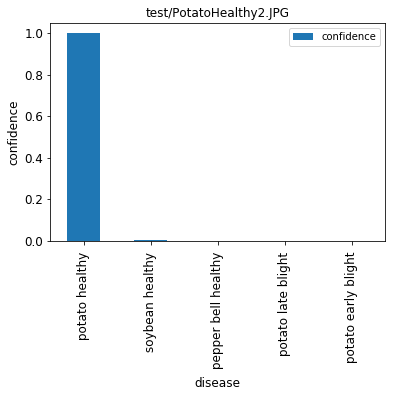

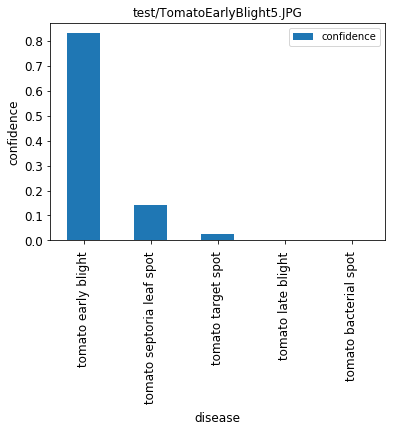

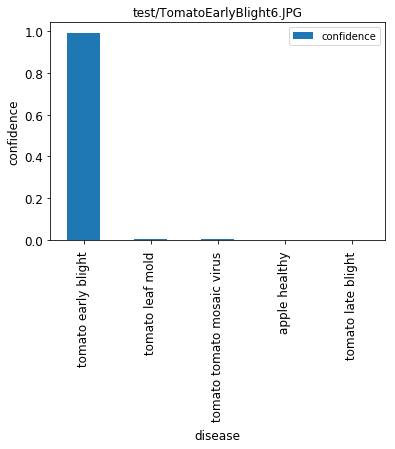

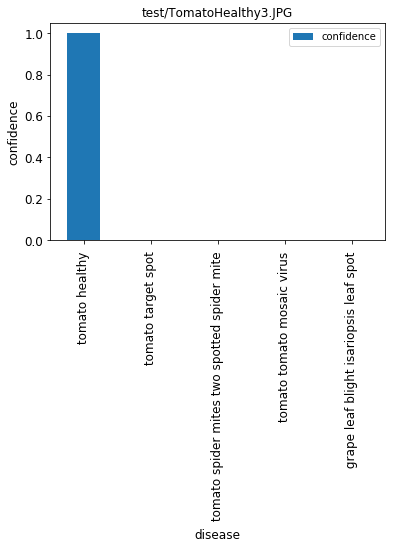

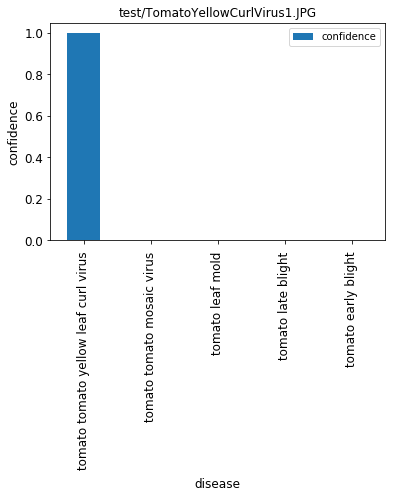

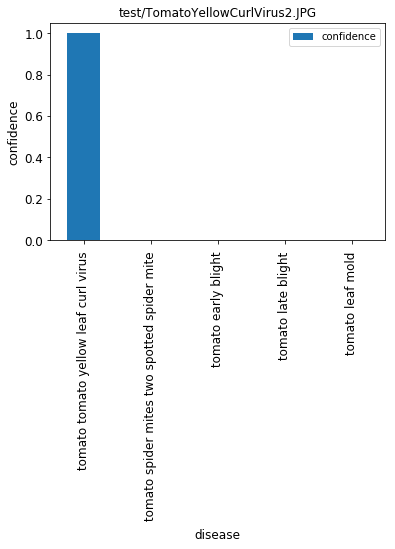

In [0]:
plotTestResults("logs_MobileNet_BS200")

### 6.4 MobileNet (Learning Rate = 0.1)

#### 6.4.1 Model Training

In [0]:
!python -m retrain \
--architecture=MobileNet_1.0_224 \
--bottleneck_dir=logs_MobileNet_LR01/bottlenecks \
--how_many_training_steps=20000 \
--train_batch_size=100 \
--learning_rate=0.1 \
--model_dir=logs_MobileNet_LR01/models/ \
--summaries_dir=logs_MobileNet_LR01/training_summaries/ \
--output_graph=logs_MobileNet_LR01/retrained_graph.pb \
--output_labels=logs_MobileNet_LR01/retrained_labels.txt \
--image_dir=train \
--log_dir=logs_MobileNet_LR01 \
--print_misclassified_test_images

Output hidden; open in https://colab.research.google.com to view.

#### 6.4.2 Model Evaluation

In [0]:
Actuals, Predictions, test_files = getTestResults("logs_MobileNet_LR01")

In [0]:
print("Accuracy", accuracy_score(Actuals, Predictions))

Accuracy 0.9403905447070915


In [0]:
ground_truth_labels = sorted(os.listdir("logs_MobileNet_LR01/bottlenecks"))
cr = printClassificationReport(Actuals, Predictions, ground_truth_labels)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.95      0.93        22
                                 Apple___Black_rot       0.97      0.97      0.97        35
                          Apple___Cedar_apple_rust       0.94      0.97      0.95        31
                                   Apple___healthy       0.93      1.00      0.96        25
                               Blueberry___healthy       1.00      1.00      1.00        19
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00        27
                 Cherry_(including_sour)___healthy       0.96      0.96      0.96        28
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.90      0.95        21
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98        23
               Corn_(maize)___Northern_Leaf_Blight       0.95      1.00      0.

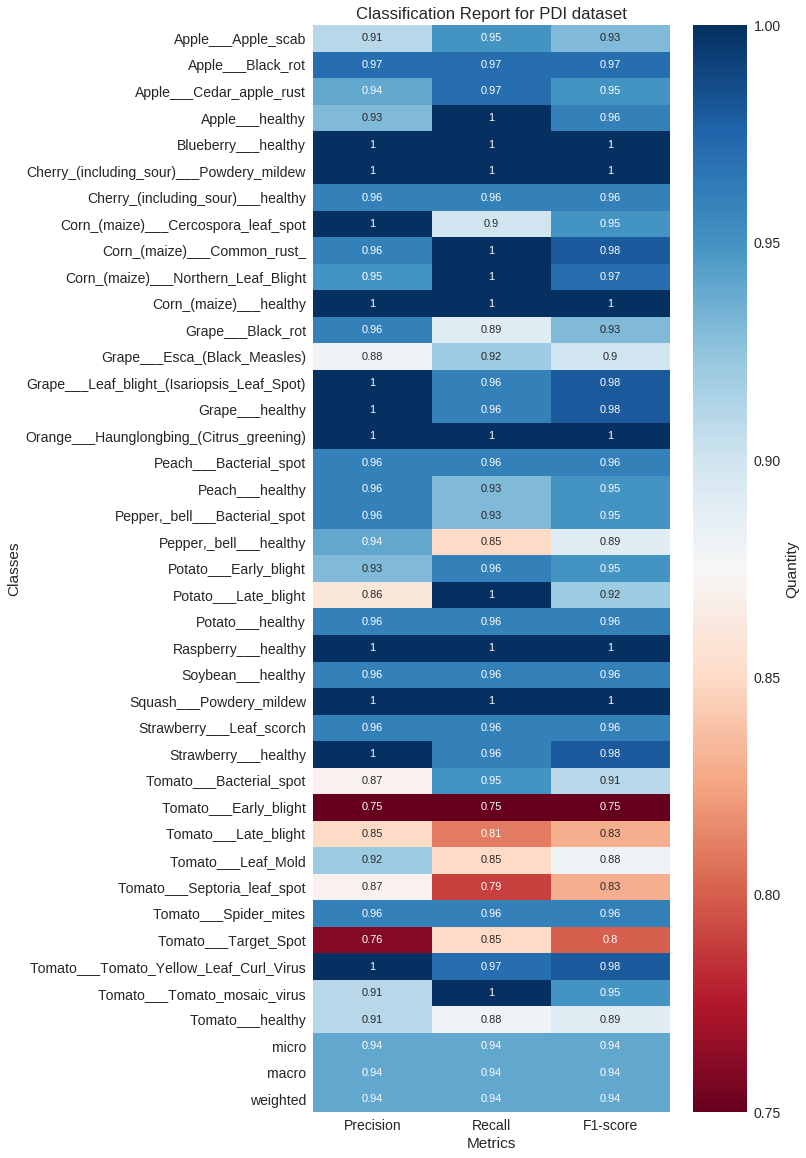

In [0]:
plotClassificationReport(cr)

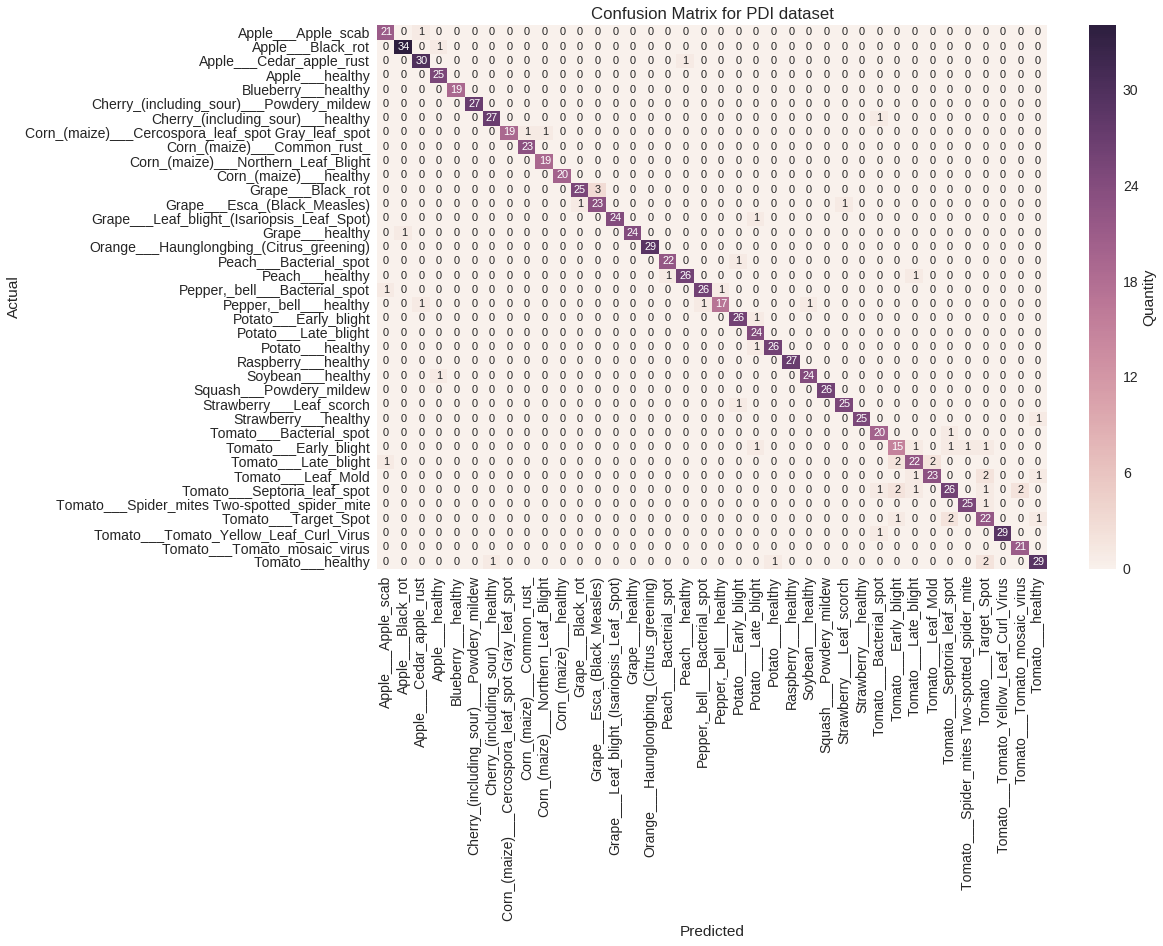

In [0]:
plotConfusionMatrix(Actuals, Predictions, ground_truth_labels)

In [0]:
plotMisclassifiedImages(Actuals, Predictions, test_files, "logs_MobileNet_LR01/bottlenecks")

Output hidden; open in https://colab.research.google.com to view.

#### 6.4.3 Model Testing

In [0]:
import os
if os.path.isfile("logs_MobileNet_LR01/test_results.txt"):
  os.remove("logs_MobileNet_LR01/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_MobileNet_LR01/retrained_graph.pb \
  --image=$testfile \
  --input_layer=input \
  --input_height=224 \
  --input_width=224 \
  --labels=logs_MobileNet_LR01/retrained_labels.txt \
  --log_dir=logs_MobileNet_LR01


Evaluation time (1-image): 1.130s

apple cedar apple rust (score=1.00000)
apple apple scab (score=0.00000)
peach healthy (score=0.00000)
apple black rot (score=0.00000)
peach bacterial spot (score=0.00000)


2019-02-19 12:24:35.642317: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.112s

apple cedar apple rust (score=0.99998)
cherry including sour healthy (score=0.00002)
corn maize cercospora leaf spot gray leaf spot (score=0.00000)
potato late blight (score=0.00000)
tomato spider mites two spotted spider mite (score=0.00000)


2019-02-19 12:24:41.921205: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.099s

apple apple scab (score=1.00000)
squash powdery mildew (score=0.00000)
apple black rot (score=0.00000)
peach bacterial spot (score=0.00000)
apple cedar apple rust (score=0.00000)


2019-02-19 12:24:48.026426: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.100s

corn maize common rust (score=1.00000)
apple apple scab (score=0.00000)
corn maize northern leaf blight (score=0.00000)
peach healthy (score=0.00000)
peach bacterial spot (score=0.00000)


2019-02-19 12:24:54.109841: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.130s

corn maize common rust (score=1.00000)
corn maize cercospora leaf spot gray leaf spot (score=0.00000)
corn maize northern leaf blight (score=0.00000)
tomato target spot (score=0.00000)
peach healthy (score=0.00000)


2019-02-19 12:25:00.179214: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.163s

potato early blight (score=1.00000)
potato late blight (score=0.00000)
strawberry leaf scorch (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)
tomato late blight (score=0.00000)


2019-02-19 12:25:06.620280: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.127s

potato early blight (score=1.00000)
potato late blight (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)
apple apple scab (score=0.00000)
strawberry leaf scorch (score=0.00000)


2019-02-19 12:25:12.920706: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.170s

potato healthy (score=1.00000)
soybean healthy (score=0.00000)
pepper bell healthy (score=0.00000)
potato late blight (score=0.00000)
blueberry healthy (score=0.00000)


2019-02-19 12:25:19.252934: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.237s

potato healthy (score=1.00000)
soybean healthy (score=0.00000)
pepper bell healthy (score=0.00000)
potato late blight (score=0.00000)
blueberry healthy (score=0.00000)


2019-02-19 12:25:25.839496: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.284s

tomato early blight (score=0.97333)
tomato septoria leaf spot (score=0.02596)
tomato target spot (score=0.00068)
tomato late blight (score=0.00003)
tomato bacterial spot (score=0.00000)


2019-02-19 12:25:32.692152: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.309s

tomato early blight (score=1.00000)
tomato leaf mold (score=0.00000)
tomato tomato mosaic virus (score=0.00000)
tomato late blight (score=0.00000)
tomato spider mites two spotted spider mite (score=0.00000)


2019-02-19 12:25:39.755991: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.383s

tomato healthy (score=1.00000)
tomato target spot (score=0.00000)
tomato tomato mosaic virus (score=0.00000)
tomato spider mites two spotted spider mite (score=0.00000)
grape leaf blight isariopsis leaf spot (score=0.00000)


2019-02-19 12:25:47.338409: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.167s

tomato tomato yellow leaf curl virus (score=1.00000)
tomato tomato mosaic virus (score=0.00000)
tomato leaf mold (score=0.00000)
tomato late blight (score=0.00000)
tomato early blight (score=0.00000)


2019-02-19 12:25:54.319199: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.297s

tomato tomato yellow leaf curl virus (score=1.00000)
tomato spider mites two spotted spider mite (score=0.00000)
tomato early blight (score=0.00000)
tomato leaf mold (score=0.00000)
tomato late blight (score=0.00000)


2019-02-19 12:26:01.026719: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


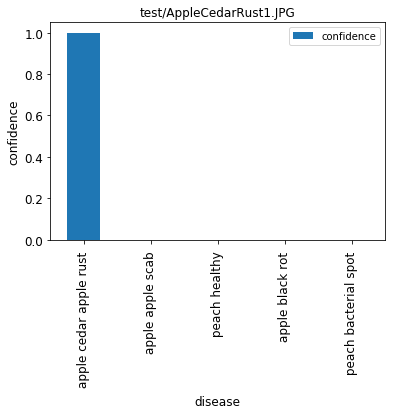

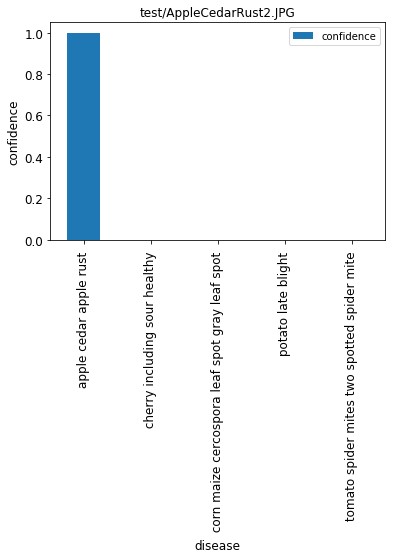

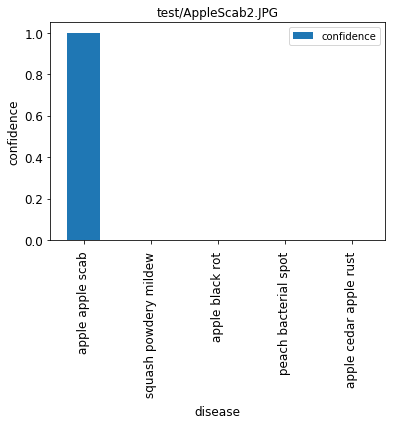

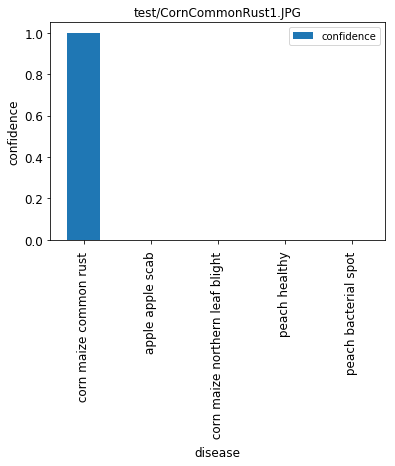

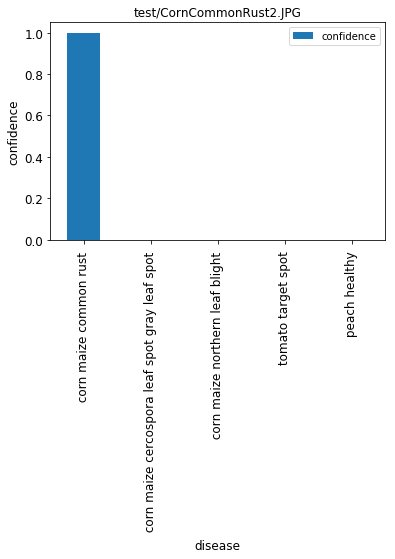

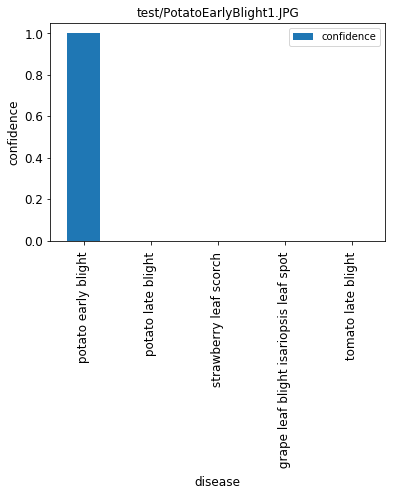

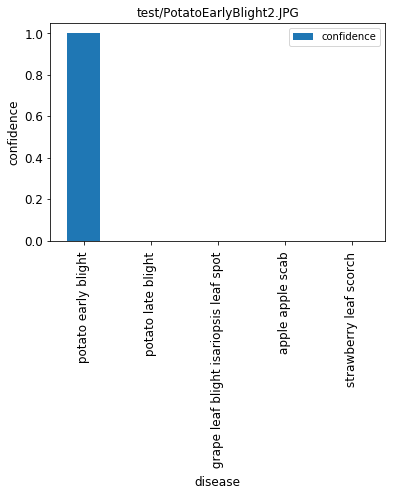

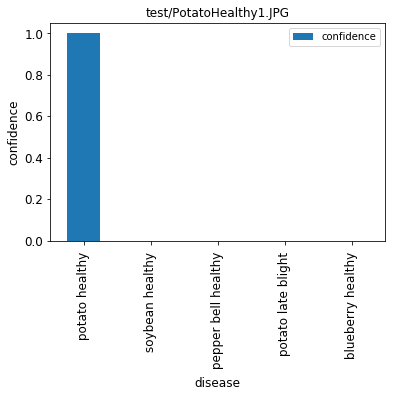

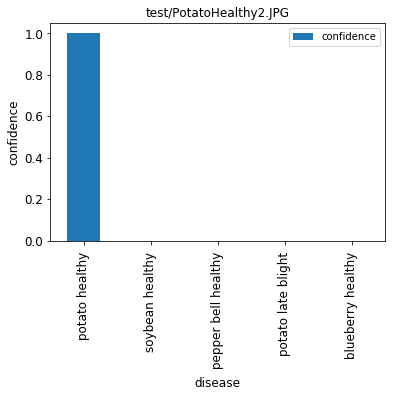

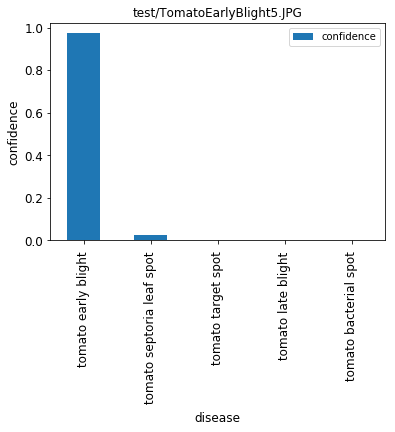

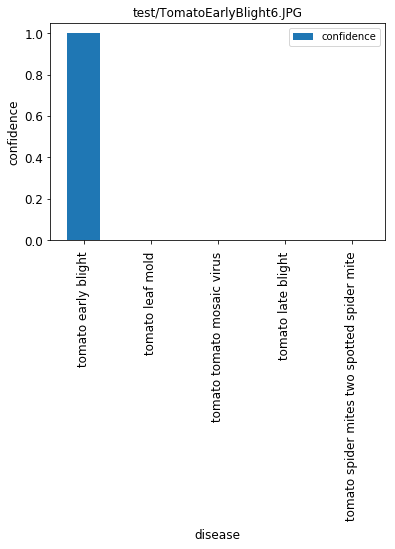

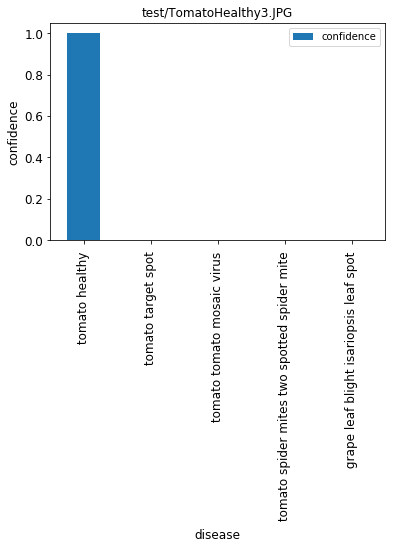

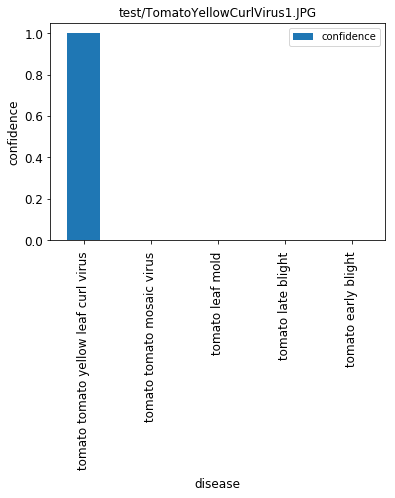

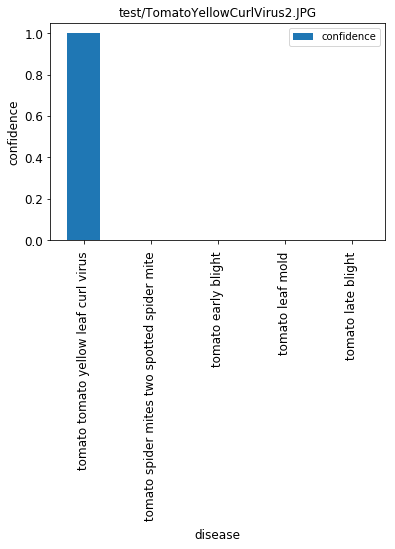

In [0]:
plotTestResults("logs_MobileNet_LR01")

### 6.5 Inception (Batch Size = 200)

#### 6.5.1 Model Training

In [0]:
!python -m retrain \
--bottleneck_dir=logs_Inception_BS200/bottlenecks \
--how_many_training_steps=20000 \
--train_batch_size=200 \
--learning_rate=0.01 \
--model_dir=logs_Inception_BS200/models/ \
--summaries_dir=logs_Inception_BS200/training_summaries/ \
--output_graph=logs_Inception_BS200/retrained_graph.pb \
--output_labels=logs_Inception_BS200/retrained_labels.txt \
--image_dir=train \
--log_dir=logs_Inception_BS200 \
--print_misclassified_test_images

Output hidden; open in https://colab.research.google.com to view.

#### 6.5.2 Model Evaluation

In [0]:
Actuals, Predictions, test_files = getTestResults("logs_Inception_BS200")

In [0]:
print("Accuracy", accuracy_score(Actuals, Predictions))

Accuracy 0.9218910585817061


In [0]:
ground_truth_labels = sorted(os.listdir("logs_Inception_BS200/bottlenecks"))
cr = printClassificationReport(Actuals, Predictions, ground_truth_labels)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.82      0.88        22
                                 Apple___Black_rot       0.97      1.00      0.99        35
                          Apple___Cedar_apple_rust       1.00      0.87      0.93        31
                                   Apple___healthy       0.86      1.00      0.93        25
                               Blueberry___healthy       0.86      1.00      0.93        19
          Cherry_(including_sour)___Powdery_mildew       0.96      1.00      0.98        27
                 Cherry_(including_sour)___healthy       0.96      0.96      0.96        28
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.95      0.91        21
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        23
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.84      0.

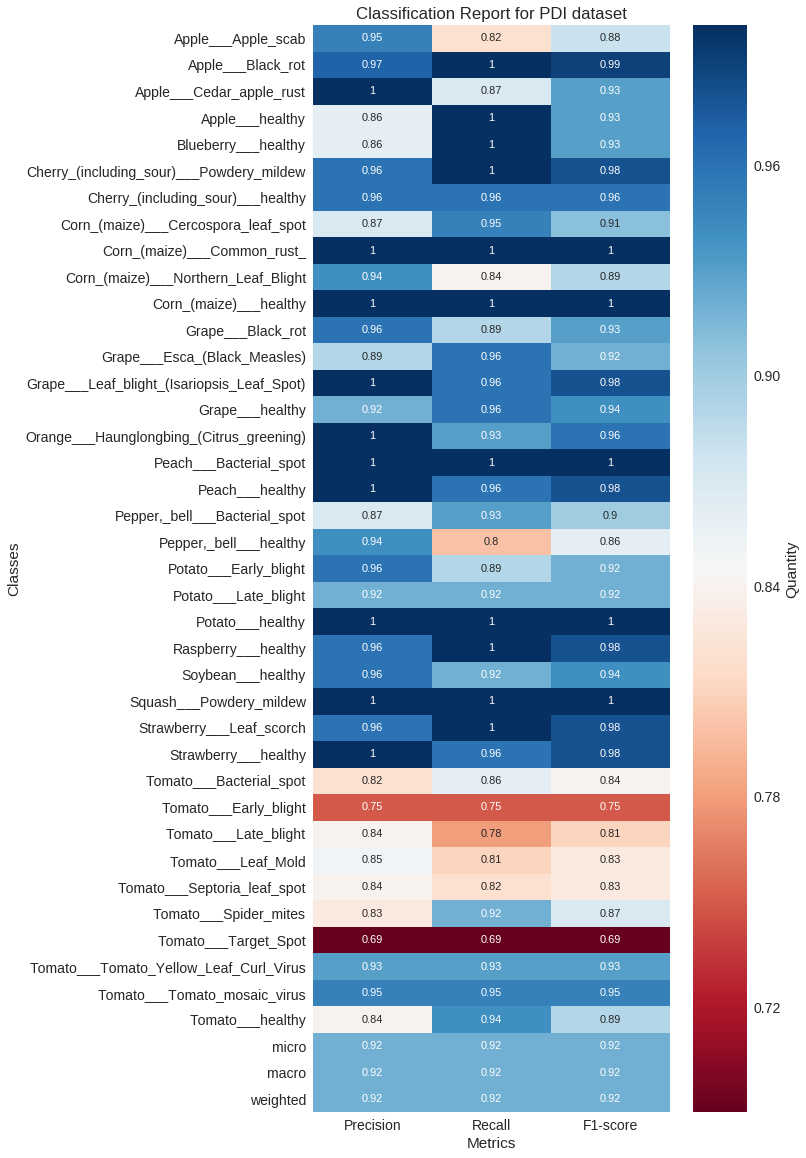

In [0]:
plotClassificationReport(cr)

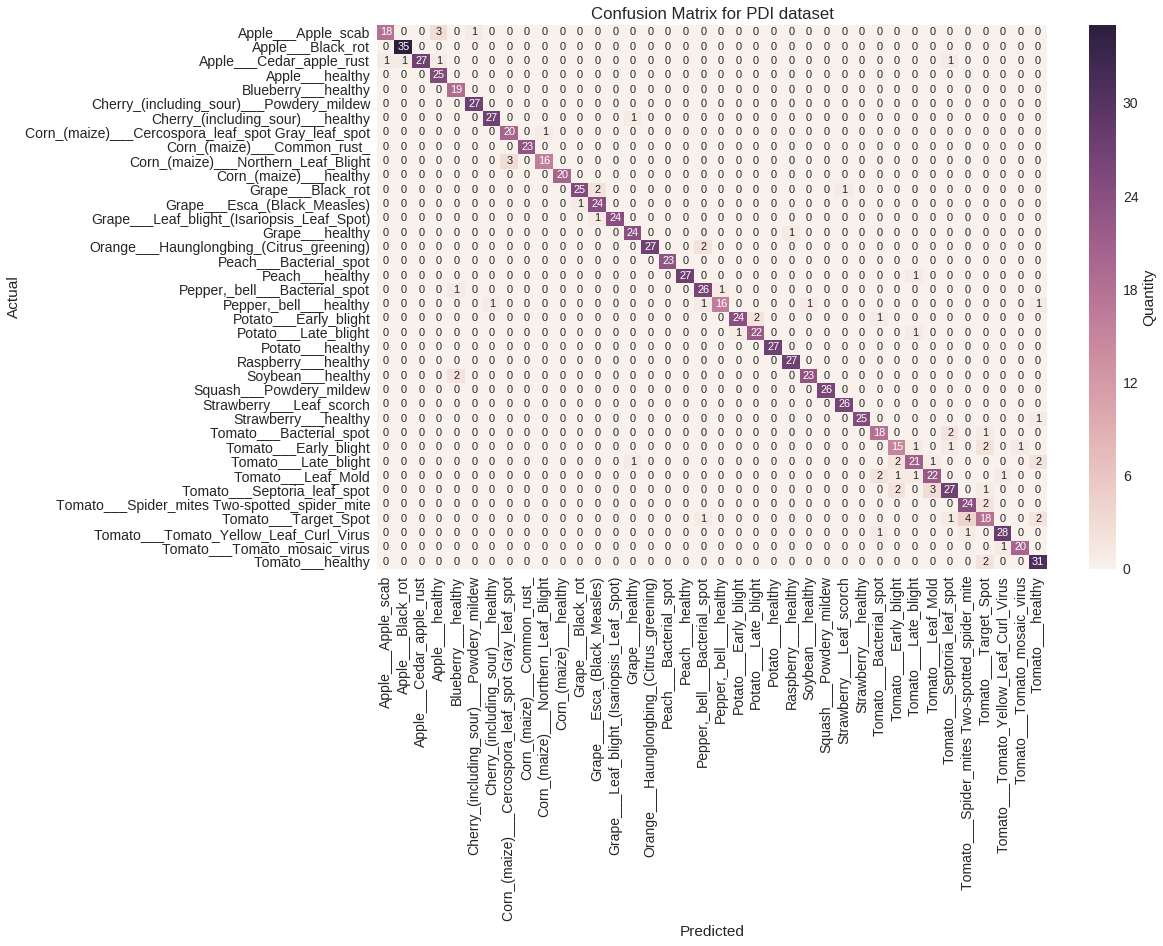

In [0]:
plotConfusionMatrix(Actuals, Predictions, ground_truth_labels)

In [0]:
plotMisclassifiedImages(Actuals, Predictions, test_files, "logs_Inception_BS200/bottlenecks")

Output hidden; open in https://colab.research.google.com to view.

#### 6.5.3 Model Testing

In [0]:
if os.path.isfile("logs_Inception_BS200/test_results.txt"):
  os.remove("logs_Inception_BS200/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_Inception_BS200/retrained_graph.pb \
  --image=$testfile \
  --input_layer=Mul \
  --input_height=299 \
  --input_width=299 \
  --labels=logs_Inception_BS200/retrained_labels.txt \
  --log_dir=logs_Inception_BS200


Evaluation time (1-image): 1.187s

apple cedar apple rust (score=0.95620)
peach healthy (score=0.01126)
peach bacterial spot (score=0.01009)
apple apple scab (score=0.00778)
cherry including sour powdery mildew (score=0.00196)


2019-02-19 12:30:09.368057: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:09.639505: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.162s

apple cedar apple rust (score=0.84696)
cherry including sour powdery mildew (score=0.04367)
apple black rot (score=0.02993)
apple healthy (score=0.02810)
peach bacterial spot (score=0.01638)


2019-02-19 12:30:16.126597: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:16.392351: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.126s

apple apple scab (score=0.98618)
tomato bacterial spot (score=0.00644)
apple cedar apple rust (score=0.00147)
apple healthy (score=0.00111)
cherry including sour powdery mildew (score=0.00104)


2019-02-19 12:30:22.818852: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:23.065985: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.138s

corn maize common rust (score=0.98677)
tomato late blight (score=0.00403)
apple cedar apple rust (score=0.00165)
tomato septoria leaf spot (score=0.00164)
apple apple scab (score=0.00129)


2019-02-19 12:30:29.466851: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:29.729848: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.136s

corn maize common rust (score=0.99218)
pepper bell bacterial spot (score=0.00169)
apple apple scab (score=0.00128)
tomato late blight (score=0.00123)
corn maize cercospora leaf spot gray leaf spot (score=0.00112)


2019-02-19 12:30:36.114010: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:36.379827: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.208s

potato early blight (score=0.94724)
potato late blight (score=0.05091)
grape leaf blight isariopsis leaf spot (score=0.00061)
strawberry leaf scorch (score=0.00043)
pepper bell bacterial spot (score=0.00022)


2019-02-19 12:30:42.784124: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:43.054132: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.145s

potato early blight (score=0.99375)
potato late blight (score=0.00331)
strawberry leaf scorch (score=0.00259)
grape leaf blight isariopsis leaf spot (score=0.00012)
tomato healthy (score=0.00009)


2019-02-19 12:30:49.504136: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:49.751992: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.139s

potato healthy (score=0.88922)
potato late blight (score=0.07085)
strawberry healthy (score=0.01453)
blueberry healthy (score=0.00893)
tomato late blight (score=0.00436)


2019-02-19 12:30:56.153552: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:30:56.410616: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.181s

potato healthy (score=0.79482)
potato late blight (score=0.16983)
blueberry healthy (score=0.01507)
soybean healthy (score=0.00765)
tomato late blight (score=0.00237)


2019-02-19 12:31:02.920925: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:31:03.220788: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.141s

tomato early blight (score=0.46535)
tomato septoria leaf spot (score=0.22742)
tomato target spot (score=0.09524)
grape esca black measles (score=0.07051)
grape black rot (score=0.06242)


2019-02-19 12:31:09.738644: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:31:10.013407: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.142s

tomato early blight (score=0.97244)
tomato bacterial spot (score=0.01112)
tomato late blight (score=0.00705)
tomato spider mites two spotted spider mite (score=0.00347)
tomato tomato mosaic virus (score=0.00285)


2019-02-19 12:31:16.503416: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:31:16.852672: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.205s

tomato healthy (score=0.89983)
tomato target spot (score=0.09268)
tomato spider mites two spotted spider mite (score=0.00446)
potato healthy (score=0.00067)
apple apple scab (score=0.00064)


2019-02-19 12:31:23.499054: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:31:23.789820: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.229s

tomato tomato yellow leaf curl virus (score=0.99444)
strawberry healthy (score=0.00133)
tomato tomato mosaic virus (score=0.00090)
tomato spider mites two spotted spider mite (score=0.00074)
tomato leaf mold (score=0.00066)


2019-02-19 12:31:30.797635: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:31:31.094758: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.218s

tomato tomato yellow leaf curl virus (score=0.99912)
tomato early blight (score=0.00038)
tomato tomato mosaic virus (score=0.00018)
tomato spider mites two spotted spider mite (score=0.00009)
tomato leaf mold (score=0.00009)


2019-02-19 12:31:38.411944: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:31:38.683061: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


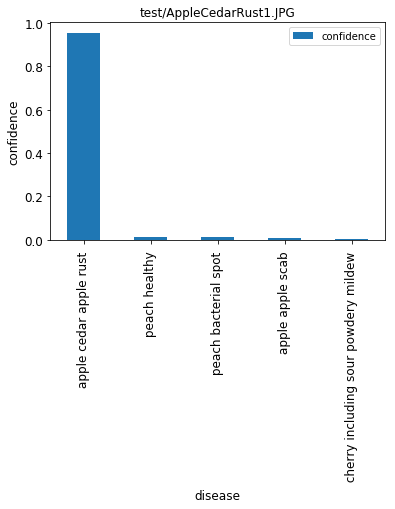

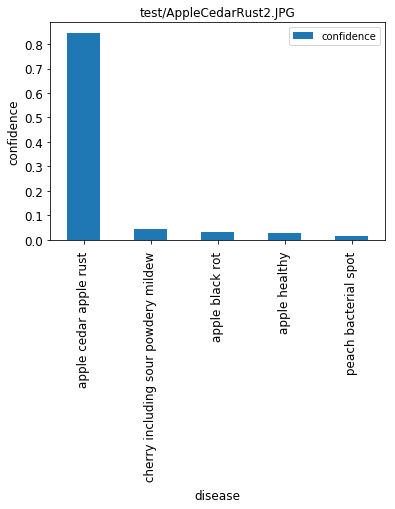

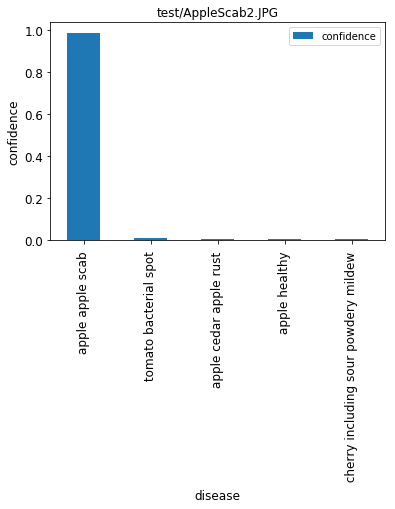

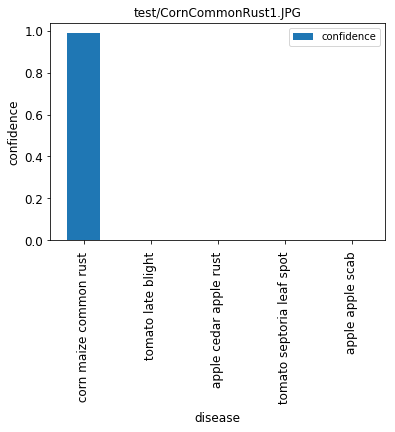

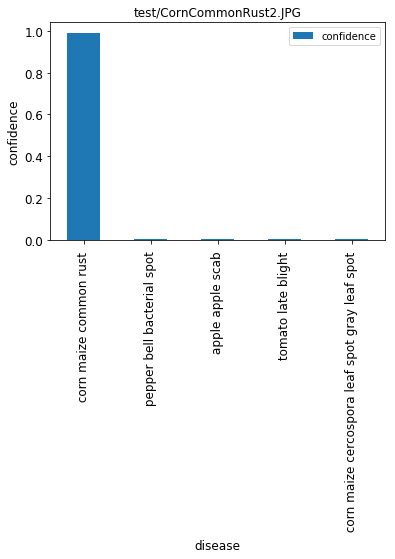

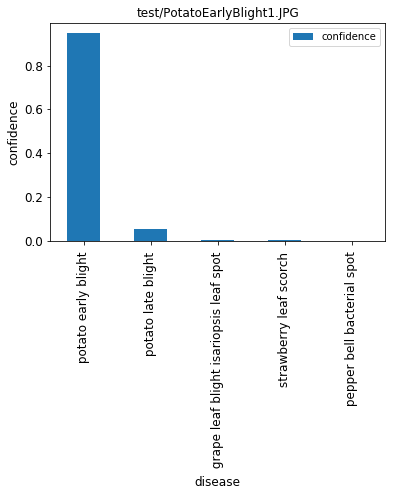

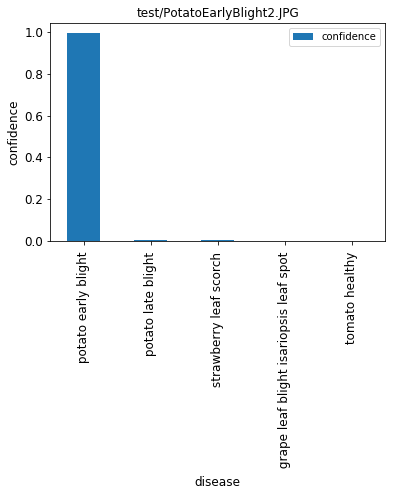

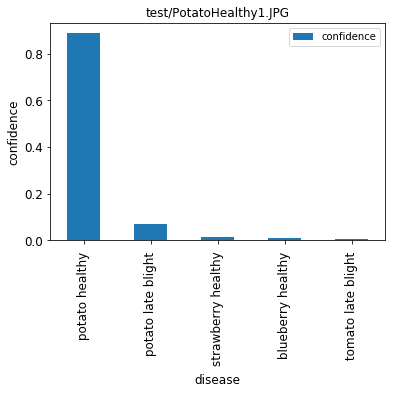

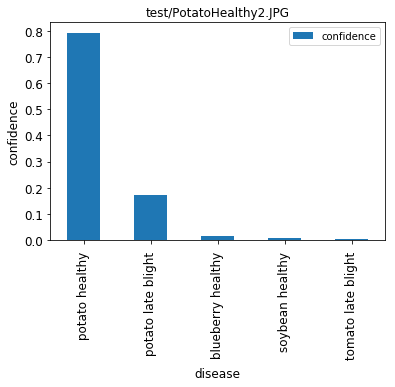

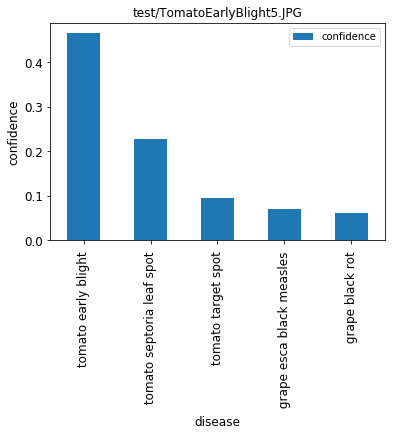

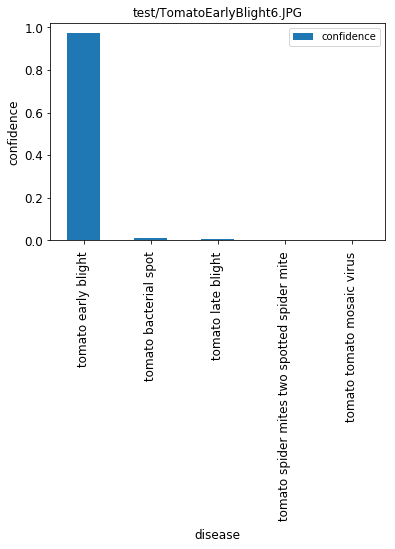

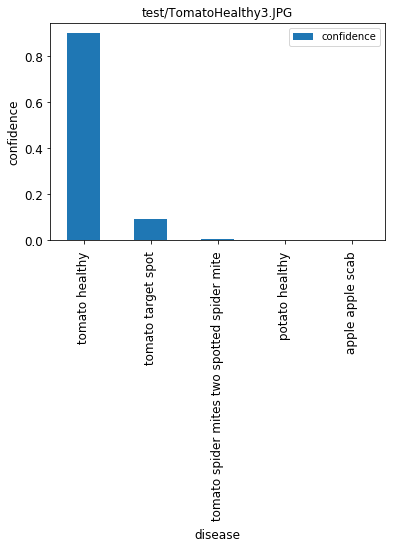

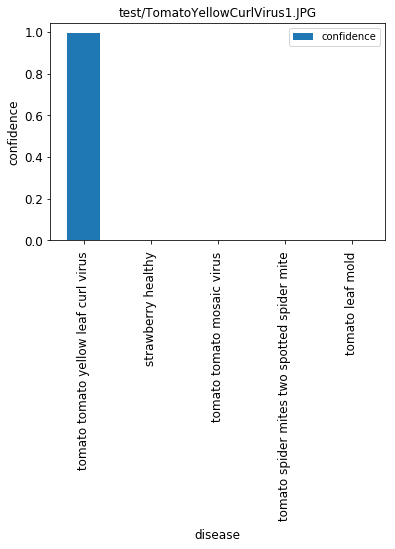

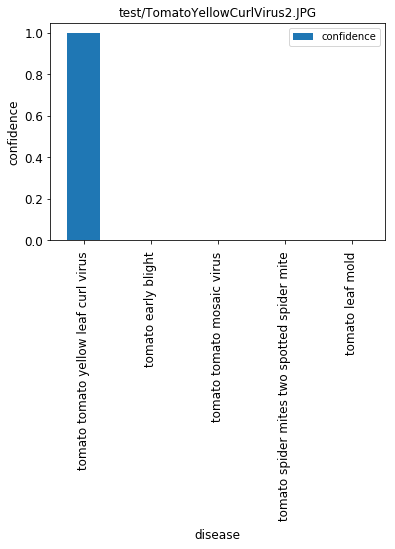

In [0]:
plotTestResults("logs_Inception_BS200")

### 6.6 Inception (Batch Size = 50)

#### 6.6.1 Model Training

In [0]:
!python -m retrain \
--bottleneck_dir=logs_Inception_BS50/bottlenecks \
--how_many_training_steps=20000 \
--train_batch_size=50 \
--learning_rate=0.01 \
--model_dir=logs_Inception_BS50/models/ \
--summaries_dir=logs_Inception_BS50/training_summaries/ \
--output_graph=logs_Inception_BS50/retrained_graph.pb \
--output_labels=logs_Inception_BS50/retrained_labels.txt \
--image_dir=train \
--log_dir=logs_Inception_BS50 \
--print_misclassified_test_images

Output hidden; open in https://colab.research.google.com to view.

#### 6.6.2 Model Evaluation

In [0]:
Actuals, Predictions, test_files = getTestResults("logs_Inception_BS50")

In [0]:
print("Accuracy", accuracy_score(Actuals, Predictions))

Accuracy 0.9229188078108942


In [0]:
ground_truth_labels = sorted(os.listdir("logs_Inception_BS50/bottlenecks"))
cr = printClassificationReport(Actuals, Predictions, ground_truth_labels)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.82      0.88        22
                                 Apple___Black_rot       0.97      1.00      0.99        35
                          Apple___Cedar_apple_rust       1.00      0.87      0.93        31
                                   Apple___healthy       0.86      1.00      0.93        25
                               Blueberry___healthy       0.86      1.00      0.93        19
          Cherry_(including_sour)___Powdery_mildew       0.96      1.00      0.98        27
                 Cherry_(including_sour)___healthy       0.96      0.96      0.96        28
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.95      0.91        21
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        23
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.84      0.

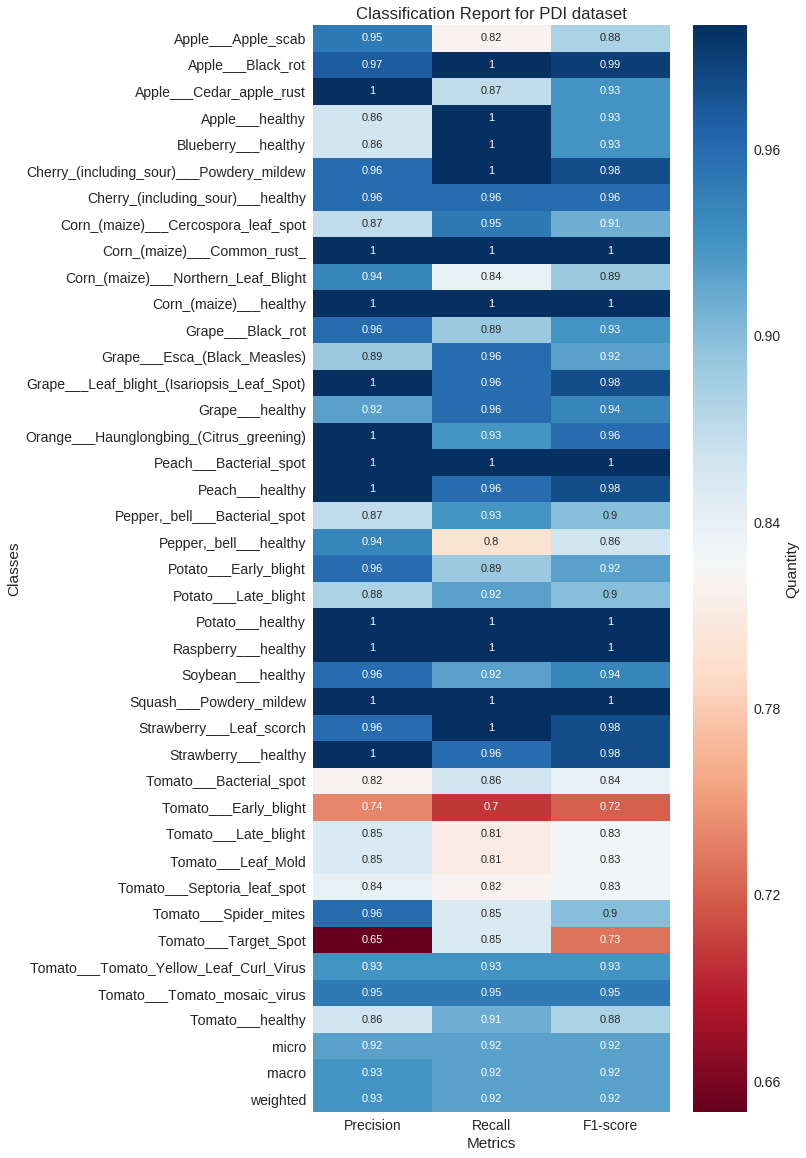

In [0]:
plotClassificationReport(cr)

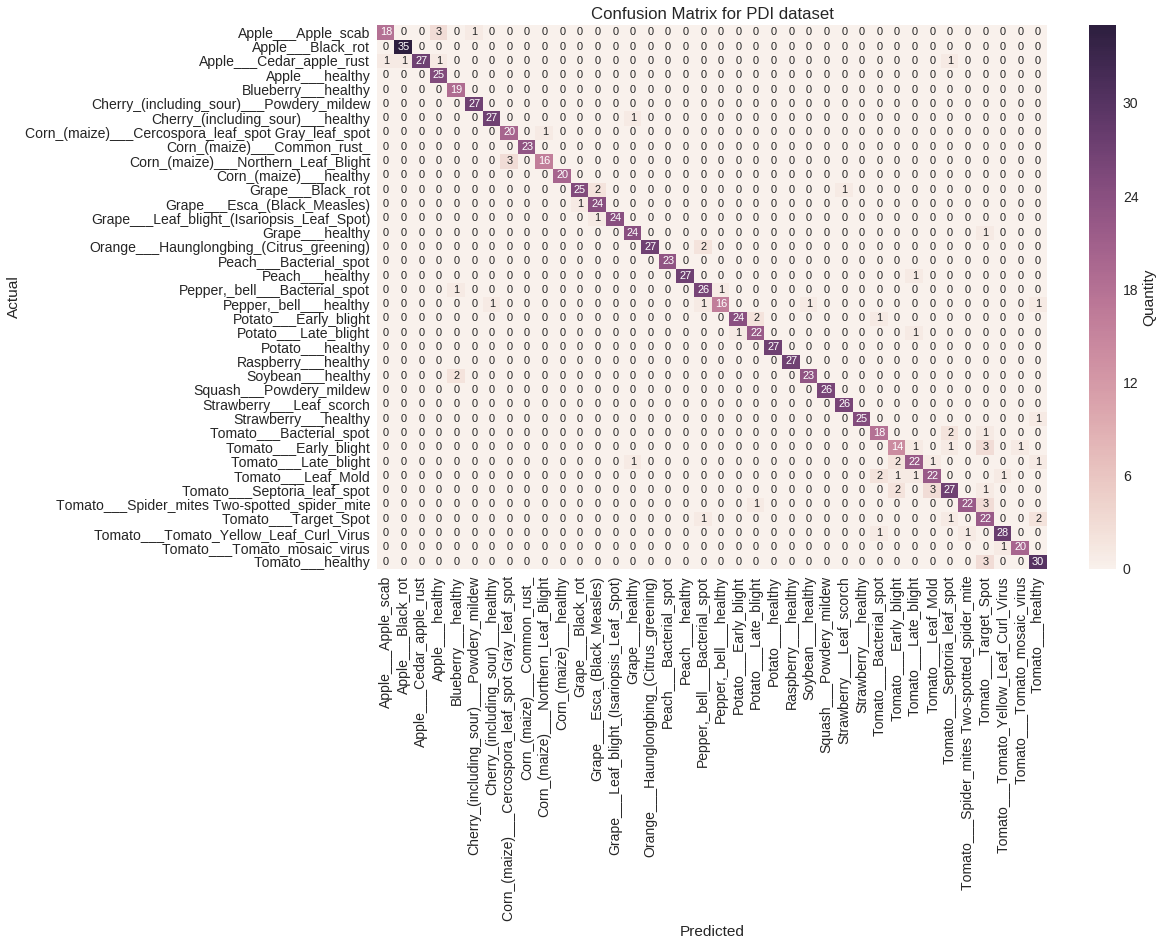

In [0]:
plotConfusionMatrix(Actuals, Predictions, ground_truth_labels)

In [0]:
plotMisclassifiedImages(Actuals, Predictions, test_files, "logs_Inception_BS50/bottlenecks")

Output hidden; open in https://colab.research.google.com to view.

#### 6.6.3 Model Testing

In [0]:
if os.path.isfile("logs_Inception_BS50/test_results.txt"):
  os.remove("logs_Inception_BS50/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_Inception_BS50/retrained_graph.pb \
  --image=$testfile \
  --input_layer=Mul \
  --input_height=299 \
  --input_width=299 \
  --labels=logs_Inception_BS50/retrained_labels.txt \
  --log_dir=logs_Inception_BS50


Evaluation time (1-image): 1.160s

apple cedar apple rust (score=0.95102)
peach healthy (score=0.01314)
peach bacterial spot (score=0.01166)
apple apple scab (score=0.00816)
tomato septoria leaf spot (score=0.00224)


2019-02-19 12:32:12.921335: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:32:13.184989: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.150s

apple cedar apple rust (score=0.82917)
cherry including sour powdery mildew (score=0.05279)
apple black rot (score=0.03119)
apple healthy (score=0.03000)
peach bacterial spot (score=0.01881)


2019-02-19 12:32:19.675301: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:32:19.918905: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.146s

apple apple scab (score=0.98638)
tomato bacterial spot (score=0.00635)
apple cedar apple rust (score=0.00123)
apple healthy (score=0.00113)
cherry including sour powdery mildew (score=0.00109)


2019-02-19 12:32:26.333137: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:32:26.582705: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.169s

corn maize common rust (score=0.98732)
tomato late blight (score=0.00384)
tomato septoria leaf spot (score=0.00166)
apple cedar apple rust (score=0.00162)
apple apple scab (score=0.00121)


2019-02-19 12:32:33.021695: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:32:33.285212: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.154s

corn maize common rust (score=0.99305)
pepper bell bacterial spot (score=0.00148)
apple apple scab (score=0.00110)
corn maize cercospora leaf spot gray leaf spot (score=0.00106)
tomato late blight (score=0.00101)


2019-02-19 12:32:39.776581: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:32:40.042172: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.132s

potato early blight (score=0.94087)
potato late blight (score=0.05752)
grape leaf blight isariopsis leaf spot (score=0.00057)
strawberry leaf scorch (score=0.00037)
pepper bell bacterial spot (score=0.00018)


2019-02-19 12:32:46.459048: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:32:46.715678: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.176s

potato early blight (score=0.99357)
potato late blight (score=0.00383)
strawberry leaf scorch (score=0.00231)
grape leaf blight isariopsis leaf spot (score=0.00011)
tomato healthy (score=0.00007)


2019-02-19 12:32:53.535021: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:32:53.801927: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.167s

potato healthy (score=0.85987)
potato late blight (score=0.09528)
strawberry healthy (score=0.01584)
blueberry healthy (score=0.01069)
tomato late blight (score=0.00483)


2019-02-19 12:33:00.632418: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:33:00.929968: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.210s

potato healthy (score=0.73765)
potato late blight (score=0.22335)
blueberry healthy (score=0.01790)
soybean healthy (score=0.00793)
tomato late blight (score=0.00245)


2019-02-19 12:33:07.696263: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:33:07.983978: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.315s

tomato early blight (score=0.48084)
tomato septoria leaf spot (score=0.21892)
tomato target spot (score=0.10816)
grape esca black measles (score=0.06931)
grape black rot (score=0.05090)


2019-02-19 12:33:15.334538: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:33:15.636180: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.213s

tomato early blight (score=0.96907)
tomato bacterial spot (score=0.01281)
tomato late blight (score=0.00750)
tomato spider mites two spotted spider mite (score=0.00379)
tomato tomato mosaic virus (score=0.00301)


2019-02-19 12:33:22.349331: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:33:22.626447: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.239s

tomato healthy (score=0.86687)
tomato target spot (score=0.12550)
tomato spider mites two spotted spider mite (score=0.00406)
apple apple scab (score=0.00080)
potato healthy (score=0.00076)


2019-02-19 12:33:29.368124: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:33:29.648775: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.146s

tomato tomato yellow leaf curl virus (score=0.99518)
strawberry healthy (score=0.00119)
tomato leaf mold (score=0.00073)
tomato tomato mosaic virus (score=0.00069)
tomato spider mites two spotted spider mite (score=0.00060)


2019-02-19 12:33:36.490161: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:33:36.751687: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 1.206s

tomato tomato yellow leaf curl virus (score=0.99919)
tomato early blight (score=0.00035)
tomato tomato mosaic virus (score=0.00015)
tomato leaf mold (score=0.00009)
tomato spider mites two spotted spider mite (score=0.00008)


2019-02-19 12:33:43.166762: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
2019-02-19 12:33:43.417040: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


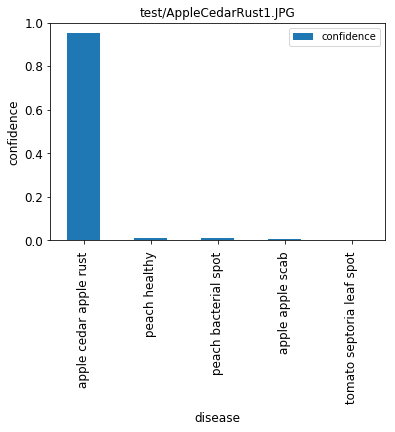

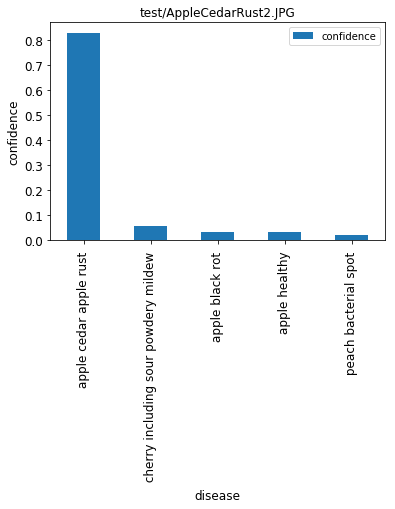

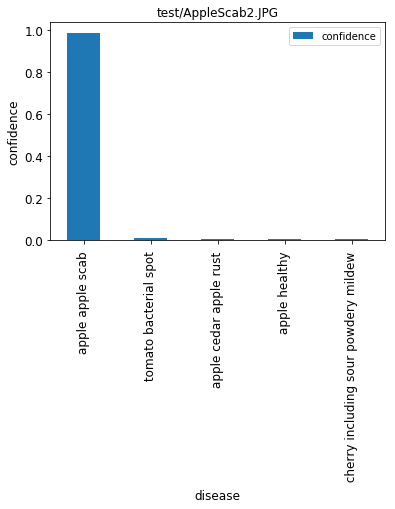

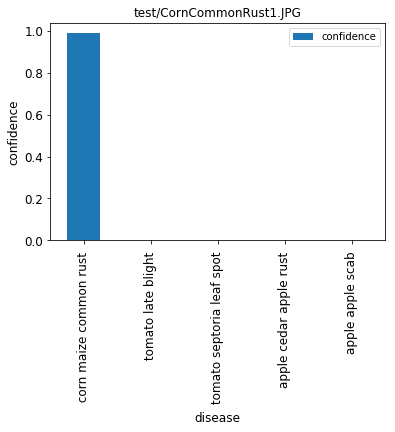

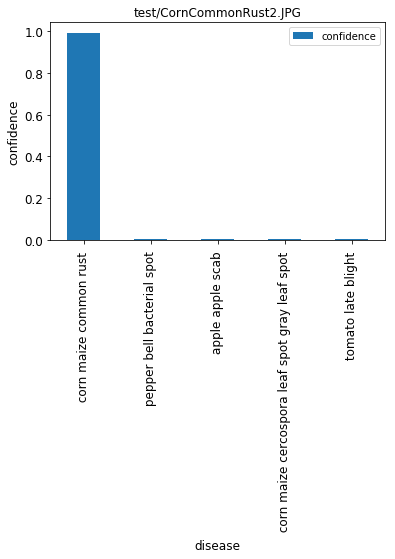

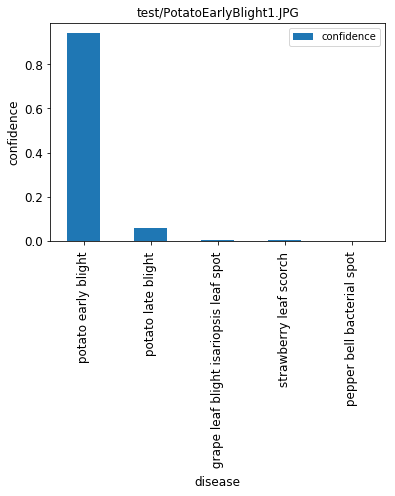

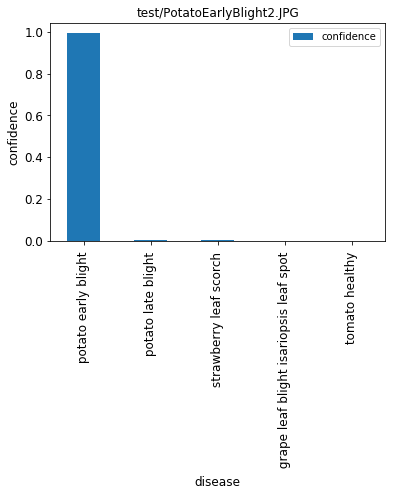

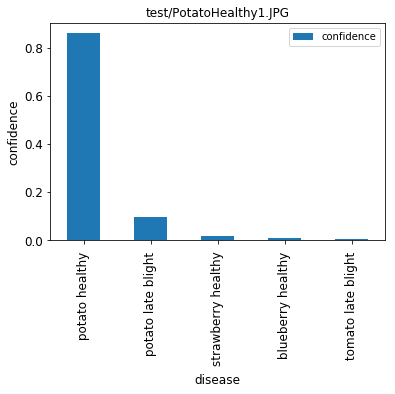

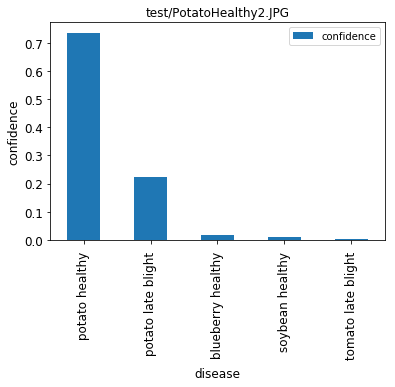

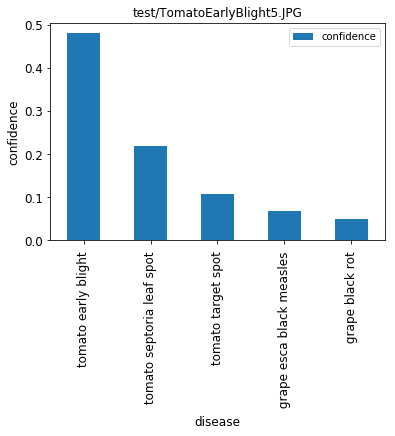

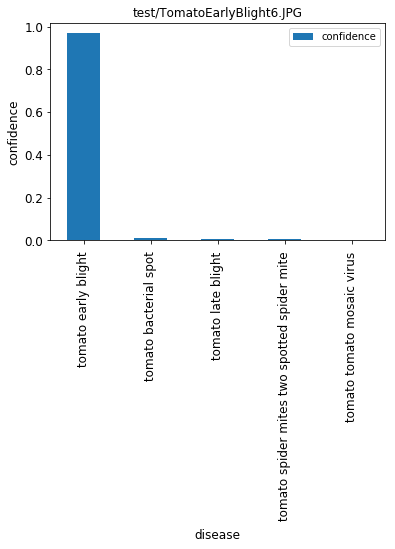

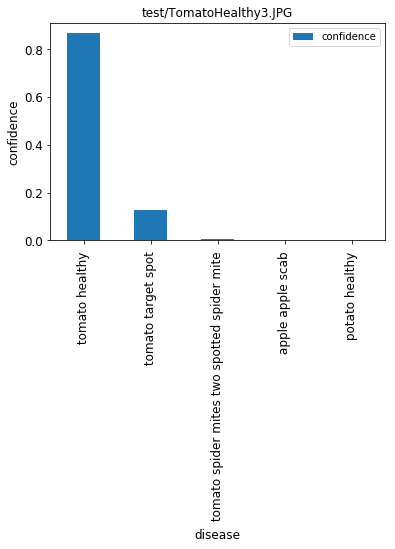

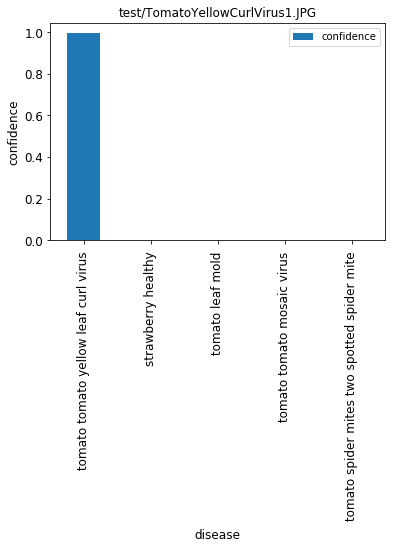

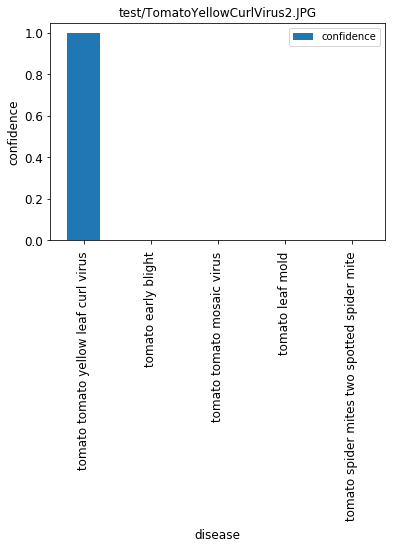

In [0]:
plotTestResults("logs_Inception_BS50")

## 7 Model Optimization and Quantization

### 7.1 Inception

#### 7.1.1 Optimization

In [0]:
model_log_list = ["logs_Inception", "logs_Inception_BS200", "logs_Inception_BS50"]

for model_log in model_log_list:
  !python -m tensorflow.python.tools.optimize_for_inference \
  --input=$model_log/retrained_graph.pb \
  --output=$model_log/optimized_graph.pb \
  --input_names="Mul" \
  --output_names="final_result"

Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
Instructions for updating:
Use tf.gfile.GFile.


#### 7.1.2 Quantization

In [0]:
for model_log in model_log_list:
  !python -m quantize_graph \
  --input=$model_log/optimized_graph.pb \
  --output=$model_log/rounded_graph.pb \
  --output_node_names=final_result \
  --mode=weights_rounded

Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.gfile.GFile.


### 7.2 MobileNet

#### 7.2.1 Optimization

In [0]:
model_log_list = ["logs_MobileNet", "logs_MobileNet_BS50", "logs_MobileNet_BS200", "logs_MobileNet_LR01"]

for model_log in model_log_list:
  !python -m tensorflow.python.tools.optimize_for_inference \
  --input=$model_log/retrained_graph.pb \
  --output=$model_log/optimized_graph.pb \
  --input_names="input" \
  --output_names="final_result"

Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
Instructions for updating:
Use tf.gfile.GFile.


#### 7.2.2 Quantization



In [0]:
for model_log in model_log_list:
  !python -m quantize_graph \
  --input=$model_log/optimized_graph.pb \
  --output=$model_log/rounded_graph.pb \
  --output_node_names=final_result \
  --mode=weights_rounded

Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
Instructions for updating:
Use tf.gfile.GFile.


## 8 Deployed Model Test

### 8.1 Prepare Test Data (all categories)

In [115]:
import os

testfiles = [os.path.join(dp, f) for dp, dn, filenames in os.walk("test_AllCat") for f in filenames]

print(testfiles)

['test_AllCat/Grape___Black_rot/GrapeBlackRot3.jpg', 'test_AllCat/Grape___Black_rot/GrapeBlackRot2.jpg', 'test_AllCat/Grape___Black_rot/GrapeBlackRot1.jpg', 'test_AllCat/Tomato___Yellow_Curl_Virus/TomatoYellowCurlVirus2.jpg', 'test_AllCat/Tomato___Yellow_Curl_Virus/TomatoYellowCurlVirus1.jpg', 'test_AllCat/Tomato___Yellow_Curl_Virus/TomatoYellowCurlVirus3.jpg', 'test_AllCat/Tomato___Tomato_mosaic_virus/TomatoMosaicVirus2.jpg', 'test_AllCat/Tomato___Tomato_mosaic_virus/TomatoMosaicVirus1.jpg', 'test_AllCat/Tomato___Tomato_mosaic_virus/TomatoMosaicVirus3.jpg', 'test_AllCat/Corn___Common_rust/CornCommonRust1.jpg', 'test_AllCat/Corn___Common_rust/CornCommonRust3.jpg', 'test_AllCat/Corn___Common_rust/CornCommonRust2.jpg', 'test_AllCat/Cherry___Powdery_mildew/CherryPowderyMildew1.jpg', 'test_AllCat/Cherry___Powdery_mildew/CherryPowderyMildew3.jpg', 'test_AllCat/Cherry___Powdery_mildew/CherryPowderyMildew2.jpg', 'test_AllCat/Cherry___healthy/CherryHealthy1.jpg', 'test_AllCat/Cherry___healthy/

### 8.2 Execute Test

1. Based on model training and evaluation results above, trained model based on MobileNet (batchsize = 50) is selected due to its highest validation accuracy amongst all evaluated models.

2. Optimized model is used for evaluating confidence levels for all category test data in test_AllCat directory.



In [117]:
if os.path.isfile("logs_MobileNet_BS50/test_results.txt"):
  os.remove("logs_MobileNet_BS50/test_results.txt")

for testfile in testfiles:
  !python -m label_image \
  --graph=logs_MobileNet_BS50/optimized_graph.pb \
  --image=$testfile \
  --input_layer=input \
  --input_height=224 \
  --input_width=224 \
  --labels=logs_MobileNet_BS50/retrained_labels.txt \
  --log_dir=logs_MobileNet_BS50

2019-02-23 13:51:12.015007: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-23 13:51:12.015274: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3271b80 executing computations on platform Host. Devices:
2019-02-23 13:51:12.015322: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-23 13:51:12.106479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-23 13:51:12.107041: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3270c60 executing computations on platform CUDA. Devices:
2019-02-23 13:51:12.107093: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-02-23 13:51:12.107519: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found d

### 8.3 Summarize Test Results

In [0]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML

# Helper method for retrieving confidence levels for test results
def getTestConfidenceLevels(log_dir):
  df = pd.DataFrame()
  df = pd.DataFrame(columns=['test_file_path','disease1','confidence1','disease2','confidence2','disease3','confidence3',
                            'disease4','confidence4','disease5','confidence5'])

  with open(log_dir + "/test_results.txt") as tr:  
     line = tr.readline()
     cnt = -1
     while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        if line.startswith("Test File"):
          cnt = cnt + 1
          filename = line.split(": ")[1].strip()
          filenamepath = line.split(": ")[1].split('/')[1].strip()
          df.loc[filename, 'test_file_path'] = filenamepath
          i = 0
        elif(line.startswith("Result")):
          i += 1
          disease = line.split(":")[1].split("(score=")[0]
          confidence = line.split(":")[1].split("(score=")[1].split(")")[0]
          df.loc[filename, 'disease' + str(i)] = disease
          df.loc[filename, 'confidence' + str(i)] = confidence
        line = tr.readline()   

  for col in ['confidence1', 'confidence2', 'confidence3', 'confidence4', 'confidence5']:
    df[col] = df[col].astype('float64') 

  df_mean = df.groupby('test_file_path')['confidence1'].mean()
  
  return df_mean

In [0]:
#Get confidence levels for all 38 plant disease categories
df_MobileNet_BS50 = getTestConfidenceLevels('logs_MobileNet_BS50')

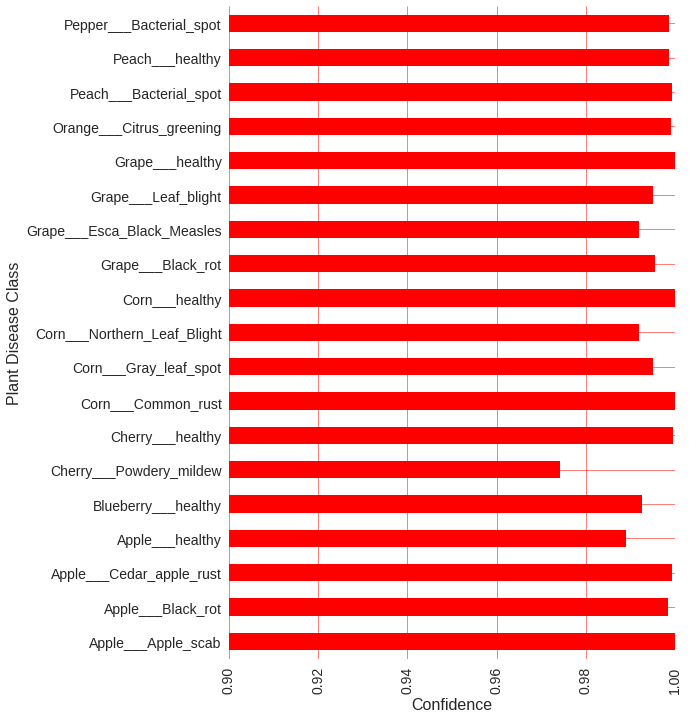

In [120]:
#Plot confidence levels for first 19 plant disease categories

ax = df_MobileNet_BS50.iloc[0:19,].plot(kind='barh', figsize=(8,12), color='red')
ax.set_facecolor('white')
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=16)
ax.set_xlabel("Confidence", fontsize=16)
ax.set_ylabel("Plant Disease Class", fontsize=16)
ax.set_xlim([0.90,1.00])
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation = 90)
ax.xaxis.set_ticks(np.arange(0.90, 1.01, 0.02))
ax.grid(linestyle='-', linewidth='0.5', color='red')

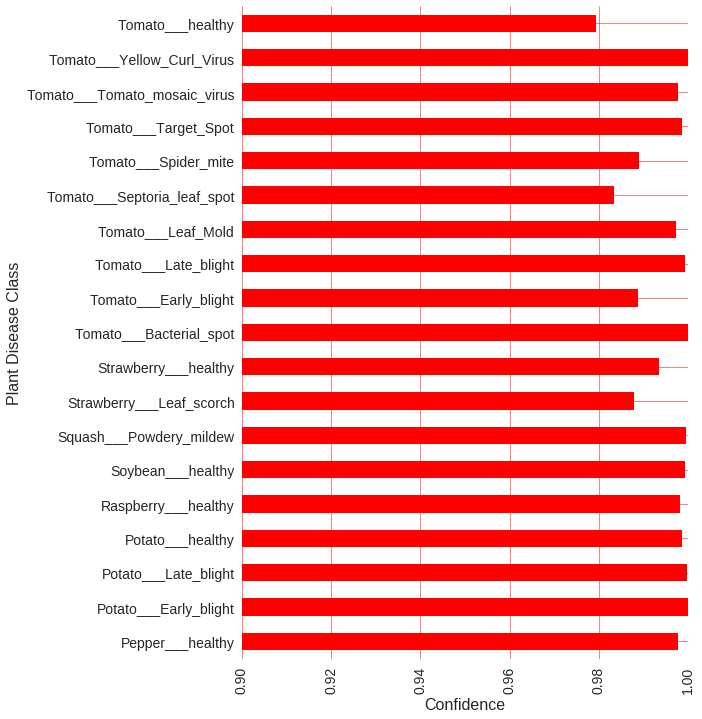

In [121]:
#Plot confidence levels for next 19 plant disease categories

ax = df_MobileNet_BS50.iloc[19:,].plot(kind='barh', figsize=(8,12), color='red')
ax.set_facecolor('white')
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=16)
ax.set_xlabel("Confidence", fontsize=16)
ax.set_ylabel("Plant Disease Class", fontsize=16)
ax.set_xlim([0.90,1.00])
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(rotation = 90)
ax.xaxis.set_ticks(np.arange(0.90, 1.01, 0.02))
ax.grid(linestyle='-', linewidth='0.5', color='red')

## 9 Archive and Download

### 9.1 Inception

In [0]:
downloadModelTrainFiles("logs_Inception", "logs_Inception/Backup")

In [0]:
downloadModelTrainFiles("logs_Inception_BS200", "logs_Inception_BS200/Backup")

In [0]:
downloadModelTrainFiles("logs_Inception_BS50", "logs_Inception_BS50/Backup")

### 9.2 MobileNet

In [0]:
downloadModelTrainFiles("logs_MobileNet", "logs_MobileNet/Backup")

In [0]:
downloadModelTrainFiles("logs_MobileNet_BS50", "logs_MobileNet_BS50/Backup")

In [0]:
downloadModelTrainFiles("logs_MobileNet_BS200", "logs_MobileNet_BS200/Backup")

In [0]:
downloadModelTrainFiles("logs_MobileNet_LR01", "logs_MobileNet_LR01/Backup")